In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use("fivethirtyeight")
plt.rcParams["figure.figsize"] = [8, 5]
plt.rcParams["figure.dpi"] = 200

In [3]:
df = pd.read_csv("https://ds-lecture-data.s3.ap-northeast-2.amazonaws.com/datasets/vgames2.csv", index_col=0)
df_old = df.copy()

In [4]:
# 몇몇을 육안으로 확인해본 결과, vgchartz의 자료로 보임
# 추가 검색 결과, https://github.com/BayanAlArifi/Video_Games_Sales 의 데이터를 변조한 것으로 보임
# 데이터 전처리 후 원본 데이터와 비교할 것
df.head()

Name Platform    Year      Genre  \
1                    Candace Kane's Candy Factory       DS  2008.0     Action   
2                                  The Munchables      Wii  2009.0     Action   
3  Otome wa Oanesama Boku ni Koi Shiteru Portable      PSP  2010.0  Adventure   
4                Deal or No Deal: Special Edition       DS  2010.0       Misc   
5       Ben 10 Ultimate Alien: Cosmic Destruction      PS3  2010.0   Platform   

            Publisher NA_Sales EU_Sales JP_Sales Other_Sales  
1           Destineer     0.04        0        0           0  
2  Namco Bandai Games     0.17        0        0        0.01  
3           Alchemist        0        0     0.02           0  
4           Zoo Games     0.04        0        0           0  
5         D3Publisher     0.12     0.09        0        0.04

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16598 entries, 1 to 16598
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         16598 non-null  object 
 1   Platform     16598 non-null  object 
 2   Year         16327 non-null  float64
 3   Genre        16548 non-null  object 
 4   Publisher    16540 non-null  object 
 5   NA_Sales     16598 non-null  object 
 6   EU_Sales     16598 non-null  object 
 7   JP_Sales     16598 non-null  object 
 8   Other_Sales  16598 non-null  object 
dtypes: float64(1), object(8)
memory usage: 1.3+ MB


In [6]:
df.isnull().sum()

Name             0
Platform         0
Year           271
Genre           50
Publisher       58
NA_Sales         0
EU_Sales         0
JP_Sales         0
Other_Sales      0
dtype: int64

In [7]:
# 결측치의 갯수가 크지 않으므로 drop
# 정말로 실제 게임을 개발하고자 한다면, 결측치의 값을 모두 채워넣는 편이 좋을지도..(시간이 남으면 시도할 것)
df = df.dropna().reset_index(drop=True)

In [8]:
# sales data wrangling
df['NA_Sales'] = df['NA_Sales'].replace({'[kK]': '*0.001', '[mM]': '*1'}, regex=True).map(pd.eval).astype(float)
df['EU_Sales'] = df['EU_Sales'].replace({'[kK]': '*0.001', '[mM]': '*1'}, regex=True).map(pd.eval).astype(float)
df['JP_Sales'] = df['JP_Sales'].replace({'[kK]': '*0.001', '[mM]': '*1'}, regex=True).map(pd.eval).astype(float)
df['Other_Sales'] = df['Other_Sales'].replace({'[kK]': '*0.001', '[mM]': '*1'}, regex=True).map(pd.eval).astype(float)

df['global_sales'] = df['NA_Sales'] + df['EU_Sales'] + df['JP_Sales'] + df['Other_Sales']


In [9]:
# year data wrangling
df["Year"] = df["Year"].astype(int)
for i in df[df["Year"] < 21].index:
  df.loc[i, "Year"] += 2000
for i in df[df["Year"] < 100].index:
  df.loc[i, "Year"] += 1900
df["Year"].describe()

count    16241.000000
mean      2006.406748
std          5.832087
min       1980.000000
25%       2003.000000
50%       2007.000000
75%       2010.000000
max       2020.000000
Name: Year, dtype: float64

In [10]:
# 원본 데이터와 비교
# 오차가 크지 않으므로 주어진 데이터로 진행
df1 = pd.read_csv("https://raw.githubusercontent.com/BayanAlArifi/Video_Games_Sales/master/Data/vgsales.csv", index_col=0)
df1 = df1.dropna().reset_index(drop=True)
df1["Year"] = df1["Year"].astype(int)
df1["key"] = df1["Name"] + df1["Platform"] + df1["Year"].astype(str) + df1["Genre"]
df2 = df.copy()
df2["key"] = df2["Name"] + df2["Platform"] + df2["Year"].astype(str) + df2["Genre"]
df1.rename(columns={'Global_Sales':'g'})
df1 = df1.merge(df2[["key", "global_sales"]], on="key")
df1[abs(df1["Global_Sales"]-df1["global_sales"]) > 0.02]
# df1.compare(df.sort_values(by="global_sales", ascending=False).reset_index(drop=True))

Name Platform  Year     Genre  \
103                         Tekken 3       PS  1998  Fighting   
596                    Madden NFL 13      PS3  2012    Sports   
597                    Madden NFL 13      PS3  2012    Sports   
1364      Need For Speed: Undercover      PS2  2008    Racing   
1394         Need for Speed: The Run     X360  2011    Action   
1527            Kid Icarus: Uprising      3DS  2012    Action   
3171                             Wet      PS3  2009   Shooter   
4504       Yu-Gi-Oh! GX: Tag Force 2      PSP  2007  Strategy   
5714  One Piece: Unlimited World Red      PS3  2014    Action   

                         Publisher  NA_Sales  EU_Sales  JP_Sales  Other_Sales  \
103    Sony Computer Entertainment      3.27      2.22      1.40         0.29   
596                Electronic Arts      2.11      0.23      0.00         0.22   
597                Electronic Arts      0.00      0.01      0.00         0.00   
1364               Electronic Arts      0.38      0.08      0.03         0.93   
1394               Electronic Arts      0.63      0.58      0.00         0.15   
1527                      Nintendo      0.48      0.35      0.36         0.07   
3171            Bethesda Softworks      0.22      0.27      0.01         0.11   
4504  Konami Digital Entertainment      0.03      0.20      0.10         0.11   
5714            Namco Bandai Games      0.09      0.12      0.06         0.05   

      Global_Sales                                          key  global_sales  
103           7.16                       Tekken 3PS1998Fighting          7.18  
596           2.56                   Madden NFL 13PS32012Sports          0.01  
597           0.01                   Madden NFL 13PS32012Sports          2.56  
1364          1.40      Need For Speed: UndercoverPS22008Racing          1.42  
1394          1.38        Need for Speed: The RunX3602011Action          1.36  
1527          1.28            Kid Icarus: Uprising3DS2012Action          1.26  
3171          0.63                            WetPS32009Shooter          0.61  
4504          0.42     Yu-Gi-Oh! GX: Tag Force 2PSP2007Strategy          0.44  
5714          0.30  One Piece: Unlimited World RedPS32014Action          0.32

In [11]:
# 기종별 개발기간은 다를 수도 있음
dup = df[df.Name.duplicated(keep=False)].reset_index(drop=True)
dup[~dup.duplicated(subset=["Name", "Year"], keep=False)].sort_values(by="Name")

Name Platform  Year  \
4269                                  11eyes: CrossOver      PSP  2010   
2377                                  11eyes: CrossOver     X360  2009   
5017                   18 Wheeler: American Pro Trucker      PS2  2001   
3987                   18 Wheeler: American Pro Trucker       GC  2002   
6761  2 in 1 Combo Pack: Sonic Heroes / Super Monkey...     X360  2013   
...                                                 ...      ...   ...   
7229                           Ys: The Ark of Napishtim      PS2  2005   
5022                                             ZombiU     WiiU  2012   
6825                                             ZombiU      PS4  2016   
2289                                       Zoo Hospital      Wii  2008   
6242                                       Zoo Hospital       DS  2007   

             Genre                     Publisher  NA_Sales  EU_Sales  \
4269     Adventure                           5pb      0.00      0.00   
2377     Adventure                           5pb      0.00      0.00   
5017        Racing         Acclaim Entertainment      0.20      0.15   
3987        Racing         Acclaim Entertainment      0.09      0.02   
6761          Misc                       Ubisoft      0.09      0.01   
...            ...                           ...       ...       ...   
7229  Role-Playing  Konami Digital Entertainment      0.07      0.05   
5022        Action                       Ubisoft      0.53      0.36   
6825        Action                       Ubisoft      0.00      0.04   
2289    Simulation         Majesco Entertainment      0.14      0.01   
6242    Simulation             Eidos Interactive      0.03      0.00   

      JP_Sales  Other_Sales  global_sales  
4269      0.02         0.00          0.02  
2377      0.02         0.00          0.02  
5017      0.00         0.05          0.40  
3987      0.00         0.00          0.11  
6761      0.00         0.01          0.11  
...        ...          ...           ...  
7229      0.00         0.02          0.14  
5022      0.05         0.08          1.02  
6825      0.01         0.01          0.06  
2289      0.00         0.01          0.16  
6242      0.00         0.00          0.03  

[1191 rows x 10 columns]

In [12]:
# 타이틀명과 플랫폼이 모두 같은 경우 확인
# 확인 결과 Need for Speed: Most Wanted 작품의 경우 재발매로 확인, Madden NFL 13 작품의 경우 플랫폼 오기로 보임
df[df.duplicated(["Name", "Platform"], keep=False)]

Name Platform  Year   Genre        Publisher  \
1298   Need for Speed: Most Wanted     X360  2012  Racing  Electronic Arts   
2621   Need for Speed: Most Wanted       PC  2005  Racing  Electronic Arts   
7199                 Madden NFL 13      PS3  2012  Sports  Electronic Arts   
8543                 Madden NFL 13      PS3  2012  Sports  Electronic Arts   
12268  Need for Speed: Most Wanted     X360  2005  Racing  Electronic Arts   
13514  Need for Speed: Most Wanted       PC  2012  Racing  Electronic Arts   

       NA_Sales  EU_Sales  JP_Sales  Other_Sales  global_sales  
1298       0.62      0.80      0.01         0.15          1.58  
2621       0.02      0.23      0.00         0.05          0.30  
7199       2.11      0.23      0.00         0.22          2.56  
8543       0.00      0.01      0.00         0.00          0.01  
12268      1.00      0.17      0.02         0.10          1.29  
13514      0.00      0.06      0.00         0.02          0.08

In [13]:
df.loc[8543, "Platform"] = "WiiU"

In [14]:
# 동명의 다른 장르 게임 -> 오기인지 확인
dup = df[df.Name.duplicated(keep=False)].reset_index(drop=True)
dup[~dup.duplicated(subset=["Name", "Genre"], keep=False)].sort_values(by="Name")

Name Platform  Year     Genre  \
1336                              Culdcept      PS2  2002  Strategy   
3956                              Culdcept      3DS  2012      Misc   
6924     Little Busters! Converted Edition      PSV  2012    Action   
3886  Steins;Gate: Hiyoku Renri no Darling      PSP  2012    Action   
3569                             Syndicate       PC  1992  Strategy   

            Publisher  NA_Sales  EU_Sales  JP_Sales  Other_Sales  global_sales  
1336             Sega      0.01      0.01      0.00         0.00          0.02  
3956         Nintendo      0.00      0.00      0.16         0.00          0.16  
6924        Prototype      0.00      0.00      0.03         0.00          0.03  
3886              5pb      0.00      0.00      0.06         0.00          0.06  
3569  Electronic Arts      0.00      0.05      0.00         0.01          0.06

In [15]:
df[(df.Name=="Culdcept")|(df.Name=="Little Busters! Converted Edition")|(df.Name=="Steins;Gate: Hiyoku Renri no Darling")|(df.Name=="Syndicate")]

Name Platform  Year      Genre  \
121    Steins;Gate: Hiyoku Renri no Darling      PS3  2012  Adventure   
308                               Syndicate     X360  2012    Shooter   
2887                               Culdcept      PS2  2002   Strategy   
4219   Steins;Gate: Hiyoku Renri no Darling     X360  2011  Adventure   
7366      Little Busters! Converted Edition      PSP  2010  Adventure   
7627                              Syndicate       PC  1992   Strategy   
8308   Steins;Gate: Hiyoku Renri no Darling      PSP  2012     Action   
8446                               Culdcept      3DS  2012       Misc   
10155                             Syndicate      PS3  2012    Shooter   
10558     Little Busters! Converted Edition      PS2  2009  Adventure   
14760     Little Busters! Converted Edition      PSV  2012     Action   

             Publisher  NA_Sales  EU_Sales  JP_Sales  Other_Sales  \
121                5pb      0.00      0.00      0.02         0.00   
308    Electronic Arts      0.10      0.06      0.00         0.02   
2887              Sega      0.01      0.01      0.00         0.00   
4219               5pb      0.00      0.00      0.08         0.00   
7366         Prototype      0.00      0.00      0.04         0.00   
7627   Electronic Arts      0.00      0.05      0.00         0.01   
8308               5pb      0.00      0.00      0.06         0.00   
8446          Nintendo      0.00      0.00      0.16         0.00   
10155         EA Games      0.07      0.06      0.00         0.02   
10558        Prototype      0.00      0.00      0.05         0.00   
14760        Prototype      0.00      0.00      0.03         0.00   

       global_sales  
121            0.02  
308            0.18  
2887           0.02  
4219           0.08  
7366           0.04  
7627           0.06  
8308           0.06  
8446           0.16  
10155          0.15  
10558          0.05  
14760          0.03

In [16]:
df.loc[8308, "Genre"] = "Adventure"
df.loc[7627, "Name"] = "Syndicate(1992)"
df.loc[2887, "Name"] = "Culdcept(2002)"
df.loc[14760, "Genre"] = "Adventure"

In [17]:
# 2017년 이후에 데이터는 오기로 보임
# db site의 dd/mm/yy, yy/mm/dd의 수기입력 차이에 따른 크롤링 오류로 추정
# 2000 ~ 2016년도의 데이터에도 오류가 있을것으로 추정됨(시간 남으면 고칠 것)
# 발매 년도에 맞게 수정
df[df["Year"]>2016]

Name Platform  Year  \
5196                   Brothers Conflict: Precious Baby      PSV  2017   
6765                             Imagine: Makeup Artist       DS  2020   
9911   Phantasy Star Online 2 Episode 4: Deluxe Package      PS4  2017   
14903  Phantasy Star Online 2 Episode 4: Deluxe Package      PSV  2017   

              Genre     Publisher  NA_Sales  EU_Sales  JP_Sales  Other_Sales  \
5196         Action  Idea Factory      0.00       0.0      0.01         0.00   
6765     Simulation       Ubisoft      0.27       0.0      0.00         0.02   
9911   Role-Playing          Sega      0.00       0.0      0.03         0.00   
14903  Role-Playing          Sega      0.00       0.0      0.01         0.00   

       global_sales  
5196           0.01  
6765           0.29  
9911           0.03  
14903          0.01

In [18]:
# inaccurate data correction by hand
df.loc[5196, "Year"] = 2016
df.loc[9911, "Year"] = 2016
df.loc[14903, "Year"] = 2016
df.loc[6765, "Year"] = 2009

In [19]:
# 타이틀별 플랫폼 합산 데이터
def num_of_platforms(data):
  tmp = data.groupby("Name").sum()
  tmp["Year"] = data.groupby("Name")["Year"].min()
  tmp["num_of_platforms"] = data.groupby("Name").size()
  tmp["Genre"] = data.groupby("Name")["Genre"].min()
  return tmp.reset_index()

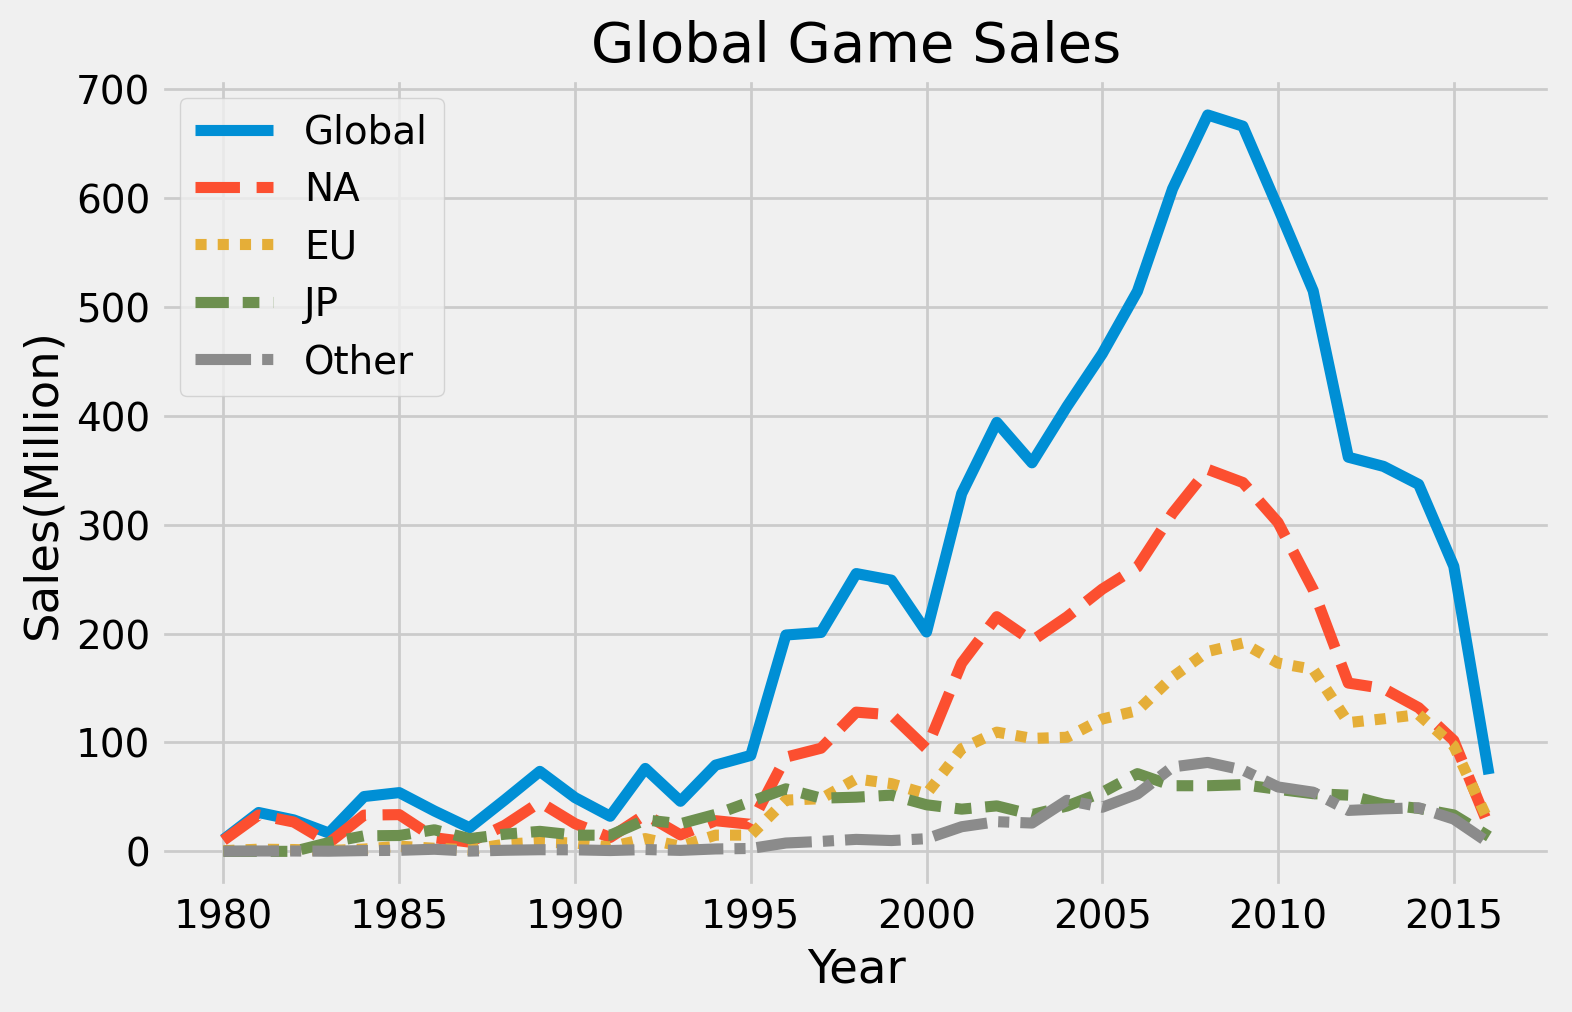

In [20]:
# global sales by year, hue:region
plt.title("Global Game Sales")
df_region = df.groupby("Year").sum()[['global_sales', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']]
sns.lineplot(data=df_region)
plt.ylabel("Sales(Million)")
plt.legend(labels=["Global","NA", "EU", "JP", "Other"]);

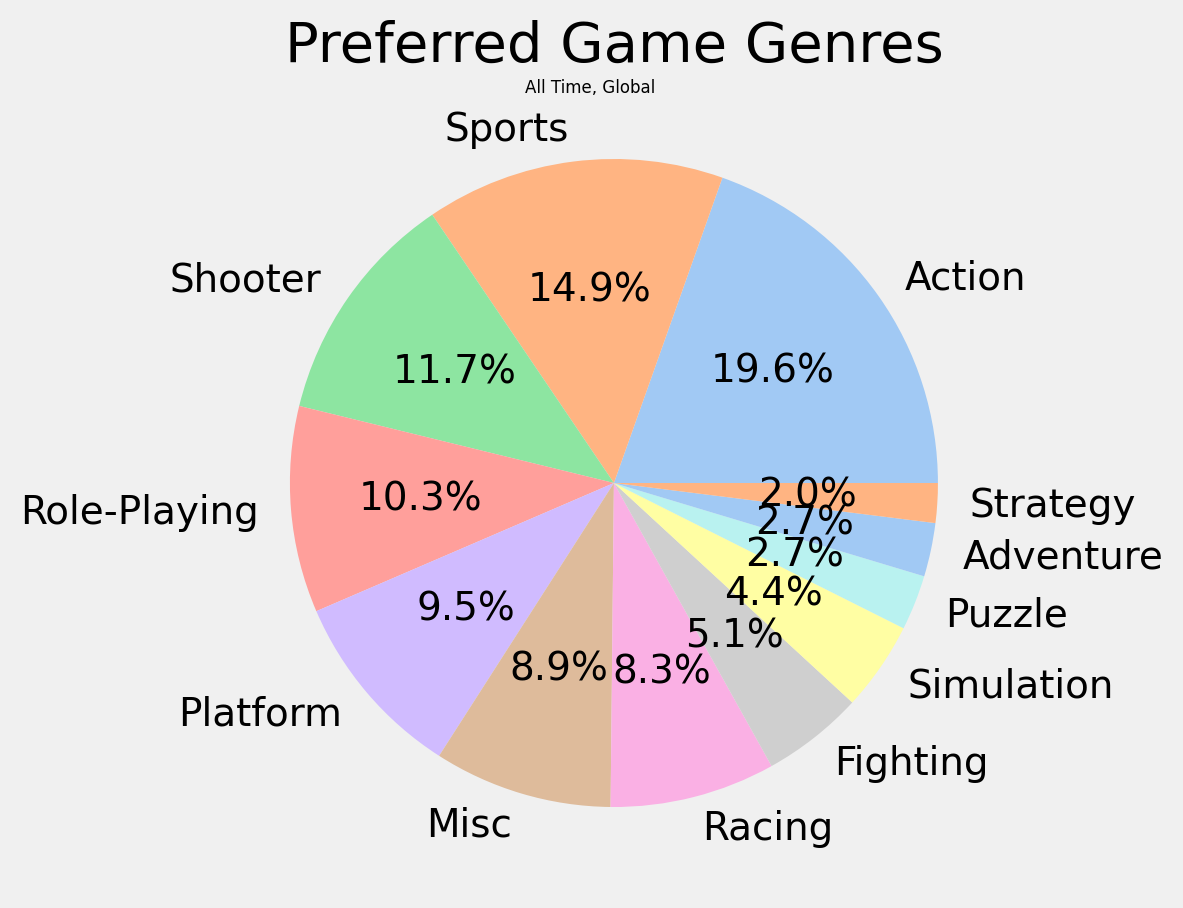

In [21]:
# preferred game genre (all time, global)
pie_alltime_global = df.groupby("Genre")["global_sales"].sum().sort_values(ascending=False)
plt.title("Preferred Game Genres", x=0.5)
plt.suptitle("All Time, Global", x=0.5, y=0.88, fontsize=6)
plt.pie(pie_alltime_global, labels=pie_alltime_global.index, autopct="%.1f%%", colors=sns.color_palette('pastel'));

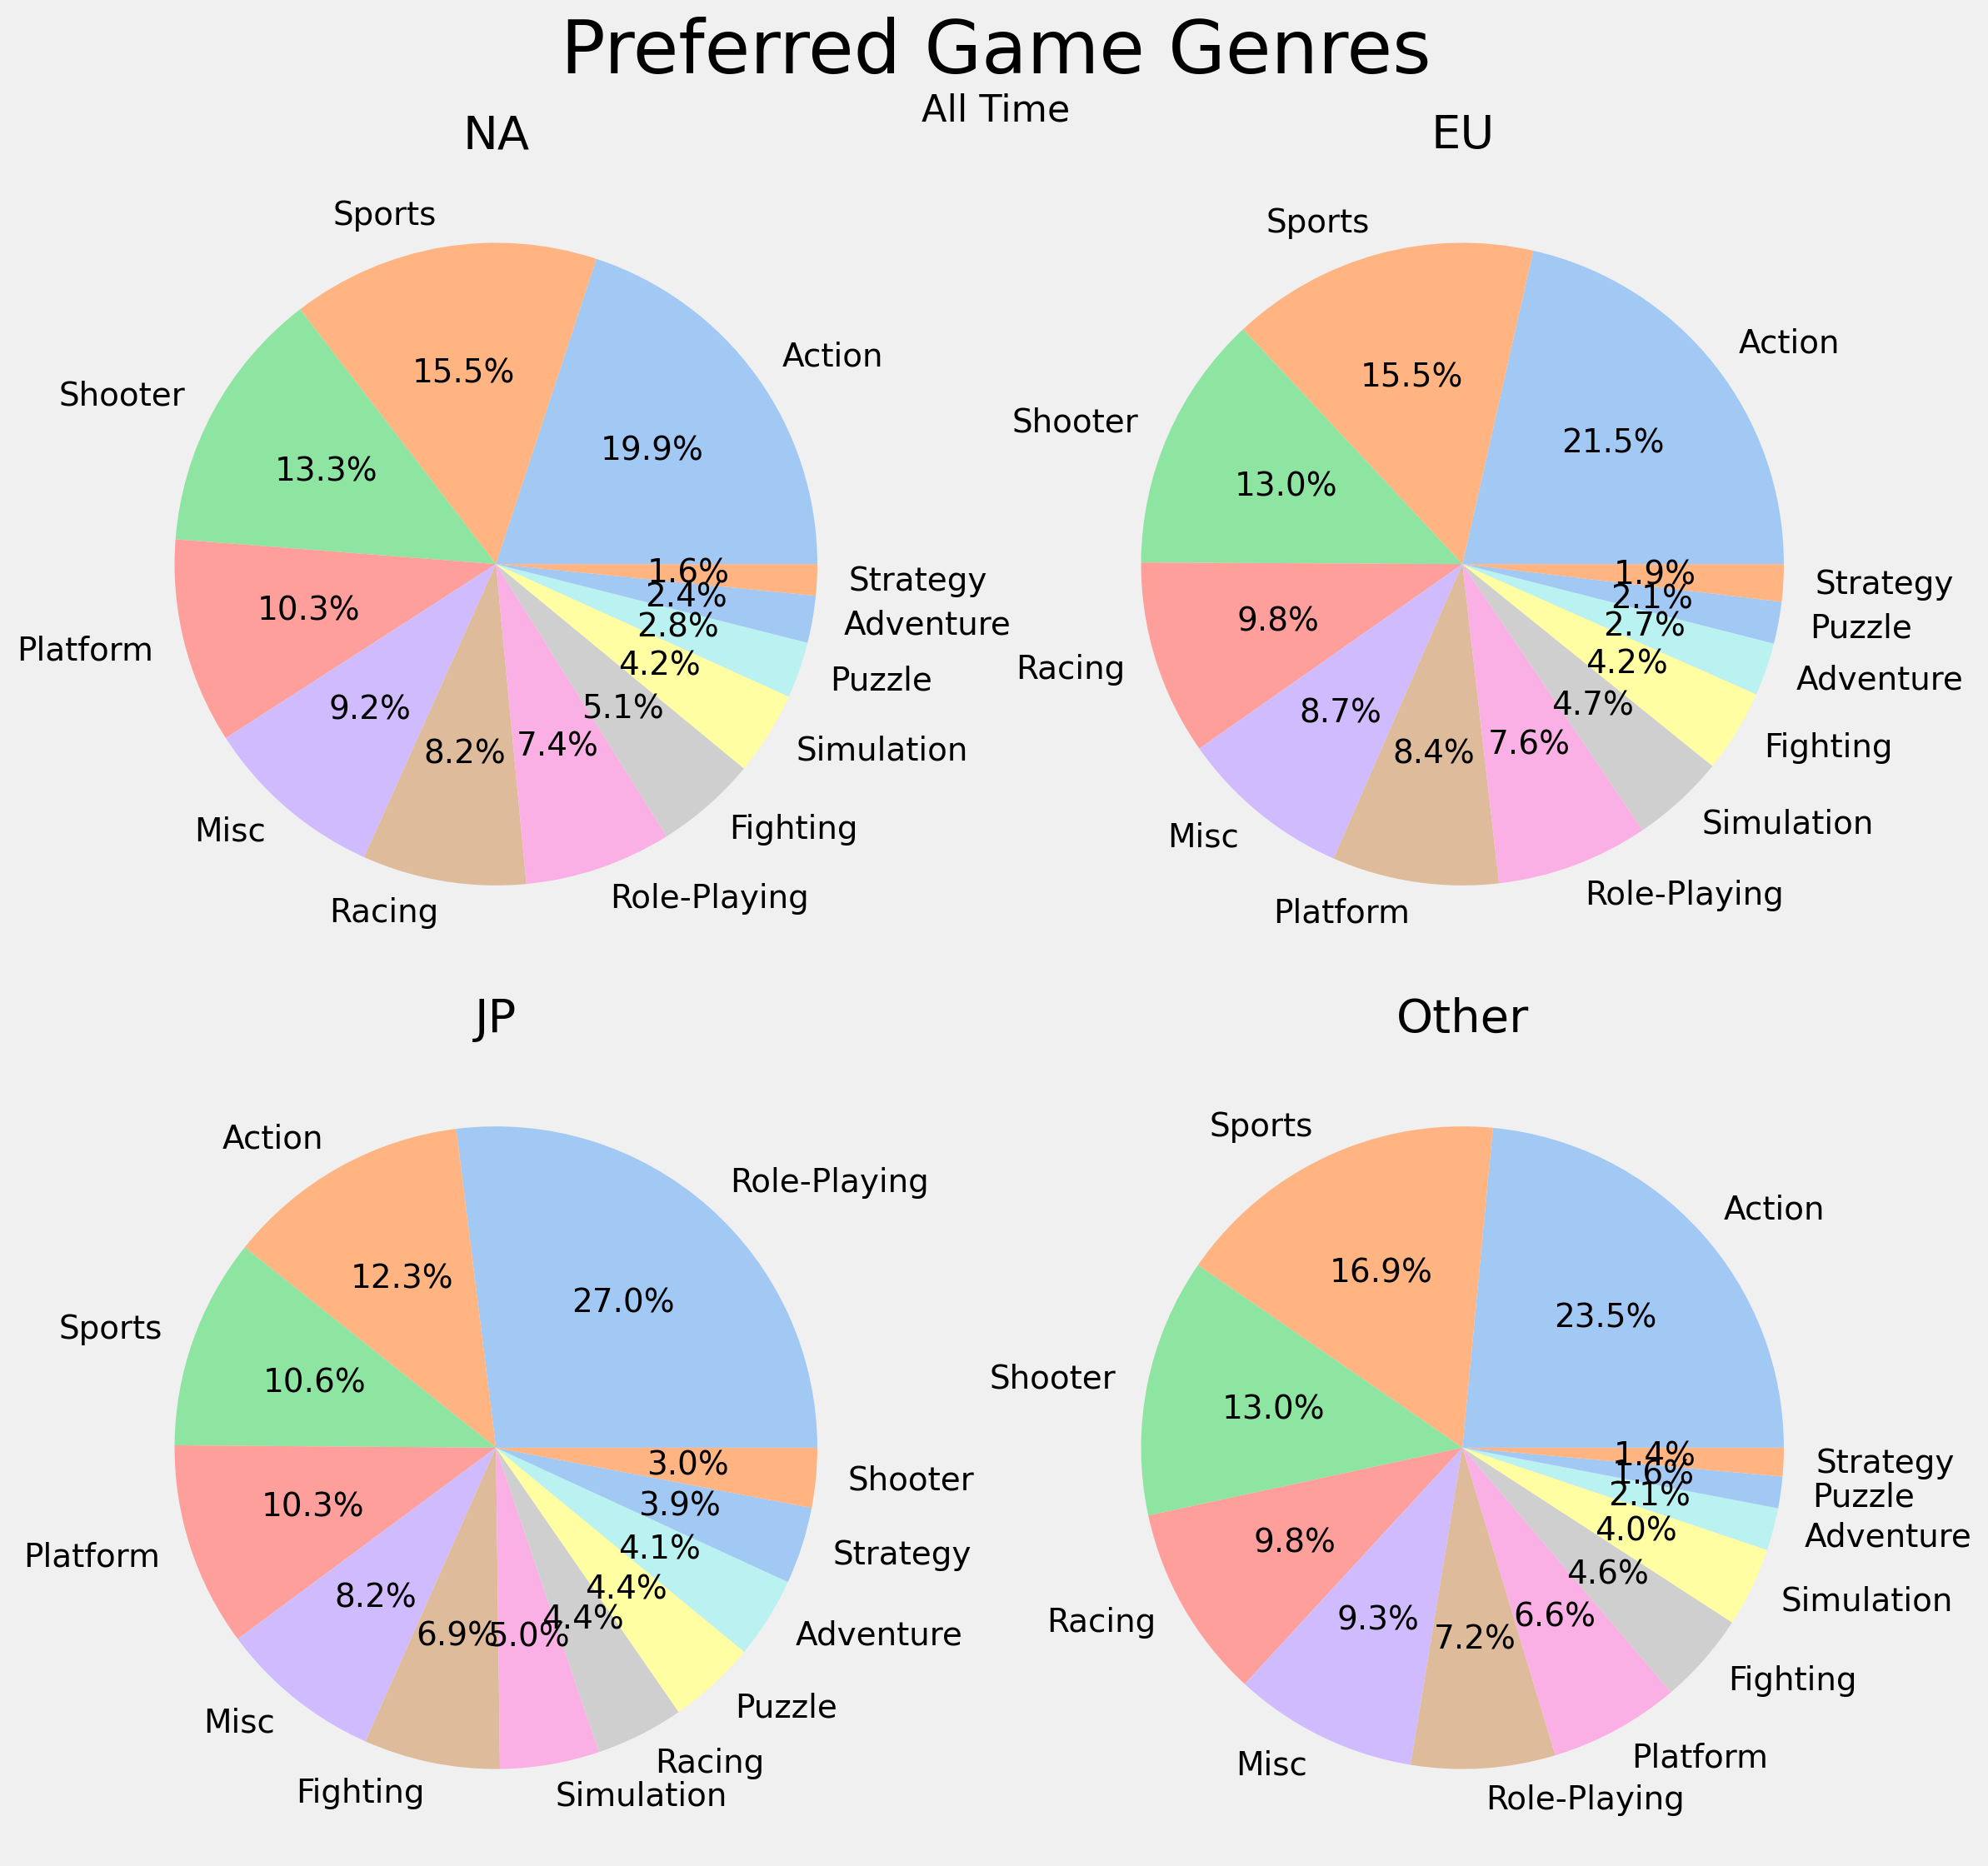

In [22]:
f, axes = plt.subplots(2, 2)
f.suptitle("Preferred Game Genres", fontsize=32, y=0.95, x=0.52)
f.text(s="All Time", fontsize=16, y=0.90, x=0.52, ha="center")
f.set_size_inches((20, 12.5))
plt.subplots_adjust(wspace = -0.5, hspace = 0.1)

for i in range(4):
  tmp = df.groupby("Genre").sum().iloc[:, i + 1].sort_values(ascending=False)
  axes[i//2, i%2].set_title(tmp.name[:-6])
  axes[i//2, i%2].pie(tmp, labels=tmp.index, autopct="%.1f%%", colors=sns.color_palette('pastel'))
plt.show()


# # preferred game genre (all time, na)
# pie_alltime_na = df.groupby("Genre")["NA_Sales"].sum().sort_values(ascending=False)
# plt.title("Preferred Game Genres", x=0.5)
# plt.suptitle("All Time, NA", y=0.88, fontsize=6)
# plt.pie(pie_alltime_na, labels=pie_alltime_na.index, autopct="%.1f%%", colors=sns.color_palette('pastel'))
# # preferred game genre (all time, eu)
# pie_alltime_eu = df.groupby("Genre")["EU_Sales"].sum().sort_values(ascending=False)
# plt.title("Preferred Game Genres", x=0.5)
# plt.suptitle("All Time, EU", x=0.5, y=0.88, fontsize=6)
# plt.pie(pie_alltime_eu, labels=pie_alltime_eu.index, autopct="%.1f%%", colors=sns.color_palette('pastel'))
# # preferred game genre (all time, jp)
# pie_alltime_jp = df.groupby("Genre")["JP_Sales"].sum().sort_values(ascending=False)
# plt.title("Preferred Game Genres", x=0.5)
# plt.suptitle("All Time, JP", x=0.5, y=0.88, fontsize=6)
# plt.pie(pie_alltime_jp, labels=pie_alltime_jp.index, autopct="%.1f%%", colors=sns.color_palette('pastel'))
# # preferred game genre (all time, other)
# pie_alltime_other = df.groupby("Genre")["Other_Sales"].sum().sort_values(ascending=False)
# plt.title("Preferred Game Genres", x=0.5)
# plt.suptitle("All Time, Other", x=0.5, y=0.88, fontsize=6)
# plt.pie(pie_alltime_other, labels=pie_alltime_other.index, autopct="%.1f%%", colors=sns.color_palette('pastel'));

In [23]:
# data of recent 10 years
df_recent = df[df["Year"] > 2006]

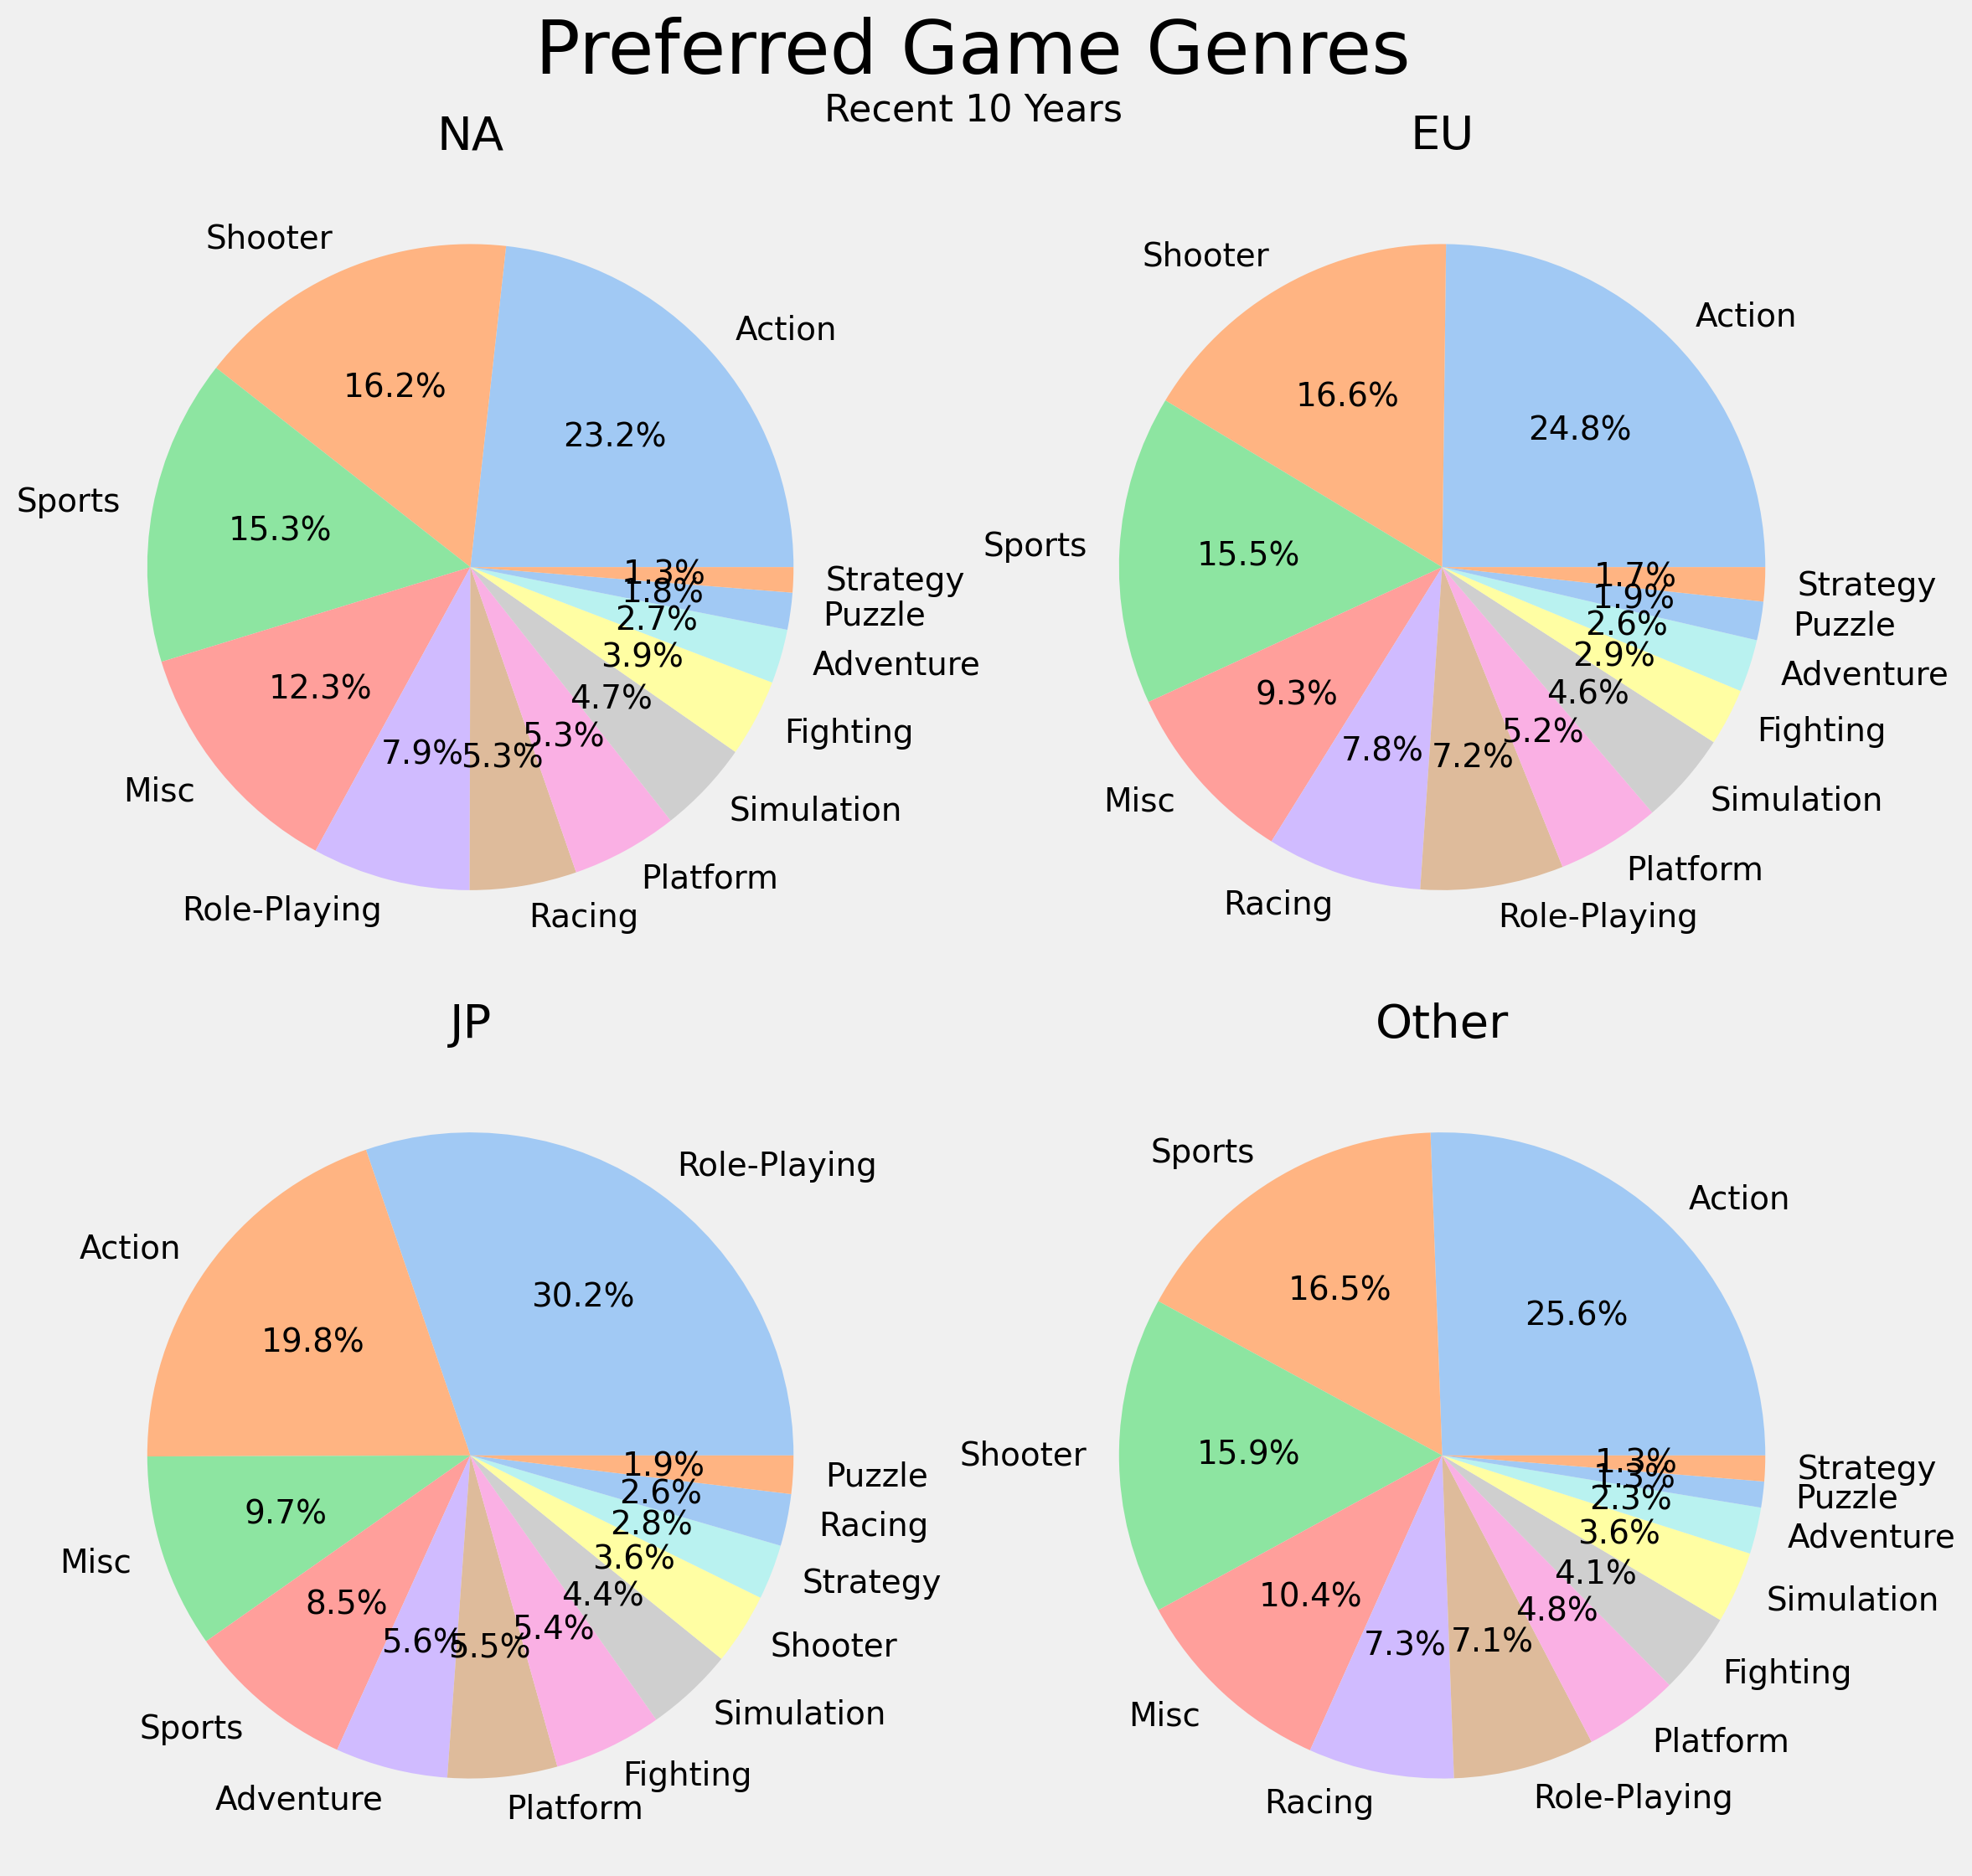

In [24]:
f, axes = plt.subplots(2, 2)
f.suptitle("Preferred Game Genres", fontsize=32, y=0.95, x=0.52)
f.text(s="Recent 10 Years", fontsize=16, y=0.90, x=0.52, ha="center")
f.set_size_inches((20, 12.5))
plt.subplots_adjust(wspace = -0.5, hspace = 0.1)

for i in range(4):
  tmp = df_recent.groupby("Genre").sum().iloc[:, i + 1].sort_values(ascending=False)
  axes[i//2, i%2].set_title(tmp.name[:-6])
  axes[i//2, i%2].pie(tmp, labels=tmp.index, autopct="%.1f%%", colors=sns.color_palette('pastel'))
plt.show()


# # preferred game genre (recent, na)
# pie_recent_na = df_recent.groupby("Genre")["NA_Sales"].sum().sort_values(ascending=False)
# plt.title("Preferred Game Genres")
# plt.suptitle("Recent 10 Years, NA", x=0.5, y=0.88, fontsize=6)
# plt.pie(pie_recent_na, labels=pie_recent_na.index, autopct="%.1f%%", colors=sns.color_palette('pastel'))
# # preferred game genre (recent, eu)
# pie_recent_eu = df_recent.groupby("Genre")["EU_Sales"].sum().sort_values(ascending=False)
# plt.title("Preferred Game Genres")
# plt.suptitle("Recent 10 Years, EU", x=0.5, y=0.88, fontsize=6)
# plt.pie(pie_recent_eu, labels=pie_recent_eu.index, autopct="%.1f%%", colors=sns.color_palette('pastel'))
# # preferred game genre (recent, jp)
# pie_recent_jp = df_recent.groupby("Genre")["JP_Sales"].sum().sort_values(ascending=False)
# plt.title("Preferred Game Genres")
# plt.suptitle("Recent 10 Years, JP", x=0.5, y=0.88, fontsize=6)
# plt.pie(pie_recent_jp, labels=pie_recent_jp.index, autopct="%.1f%%", colors=sns.color_palette('pastel'), textprops={'fontsize': 7})
# # preferred game genre (recent, other)
# pie_recent_other = df_recent.groupby("Genre")["Other_Sales"].sum().sort_values(ascending=False)
# plt.title("Preferred Game Genres")
# plt.suptitle("Recent 10 Years, Other", x=0.5, y=0.88, fontsize=6)
# plt.pie(pie_recent_other, labels=pie_recent_other.index, autopct="%.1f%%", colors=sns.color_palette('pastel'), textprops={'fontsize': 7});

In [25]:
# H_0 : preferred game genres are same by region
# Hypothesis test by Chi-squared test
from scipy.stats import chi2_contingency
df_table = df.loc[:, "Genre":"Other_Sales"].groupby("Genre").sum().T
print(f"P value is {chi2_contingency(df_table)[1].__round__(3)}")

P value is 0.0


In [26]:
df_table_recent = df_recent.loc[:, "Genre":"Other_Sales"].groupby("Genre").sum().T
print(f"P value is {chi2_contingency(df_table_recent)[1].__round__(3)}")

P value is 0.0


In [27]:
df_table_recent

Genre        Action  Adventure  Fighting    Misc  Platform  Puzzle  Racing  \
NA_Sales     488.75      56.85     81.67  258.88    112.24   38.89  112.45   
EU_Sales     338.52      35.81     39.00  126.71     70.79   26.34  106.11   
JP_Sales      93.76      26.63     25.65   45.95     25.93    9.03   12.30   
Other_Sales  128.25      11.67     20.43   51.91     23.90    6.51   36.55   

Genre        Role-Playing  Shooter  Simulation  Sports  Strategy  
NA_Sales           166.51   340.35       98.04  322.21     26.52  
EU_Sales            97.73   225.99       62.99  211.30     23.26  
JP_Sales           143.11    16.96       20.83   40.11     13.02  
Other_Sales         35.45    79.57       18.03   82.73      6.44


$ H_0 $ rejected.  

But it doesn't mean that each region's preferrence are mutually different.  

i.e, $\neg(\mu_{NA} = \mu_{EU} = \mu_{JP} = \mu_{Other}) \not\Longrightarrow ((\forall i,j \in I)\land(i \neq j)\implies \mu_i \neq \mu_j)$

In [28]:
from itertools import combinations
cmbs = combinations(df_table_recent.index, 2)
for idx, (i, j) in enumerate(cmbs):
  p = chi2_contingency(df_table_recent.loc[[i, j]])[1]
  print(f"# {idx+1} case, H_0 : mu_{i[:-6]} == mu_{j[:-6]}\n P value is {p.__round__(3)}", end="")
  if p < 0.05:
    print(", H_0 rejected")
  else:
    print(", H_0 not rejected")

# 1 case, H_0 : mu_NA == mu_EU
 P value is 0.048, H_0 rejected
# 2 case, H_0 : mu_NA == mu_JP
 P value is 0.0, H_0 rejected
# 3 case, H_0 : mu_NA == mu_Other
 P value is 0.721, H_0 not rejected
# 4 case, H_0 : mu_EU == mu_JP
 P value is 0.0, H_0 rejected
# 5 case, H_0 : mu_EU == mu_Other
 P value is 0.928, H_0 not rejected
# 6 case, H_0 : mu_JP == mu_Other
 P value is 0.0, H_0 rejected


conclusion : preferred game genres are not same by all regions, but some regions may have same preferred genres

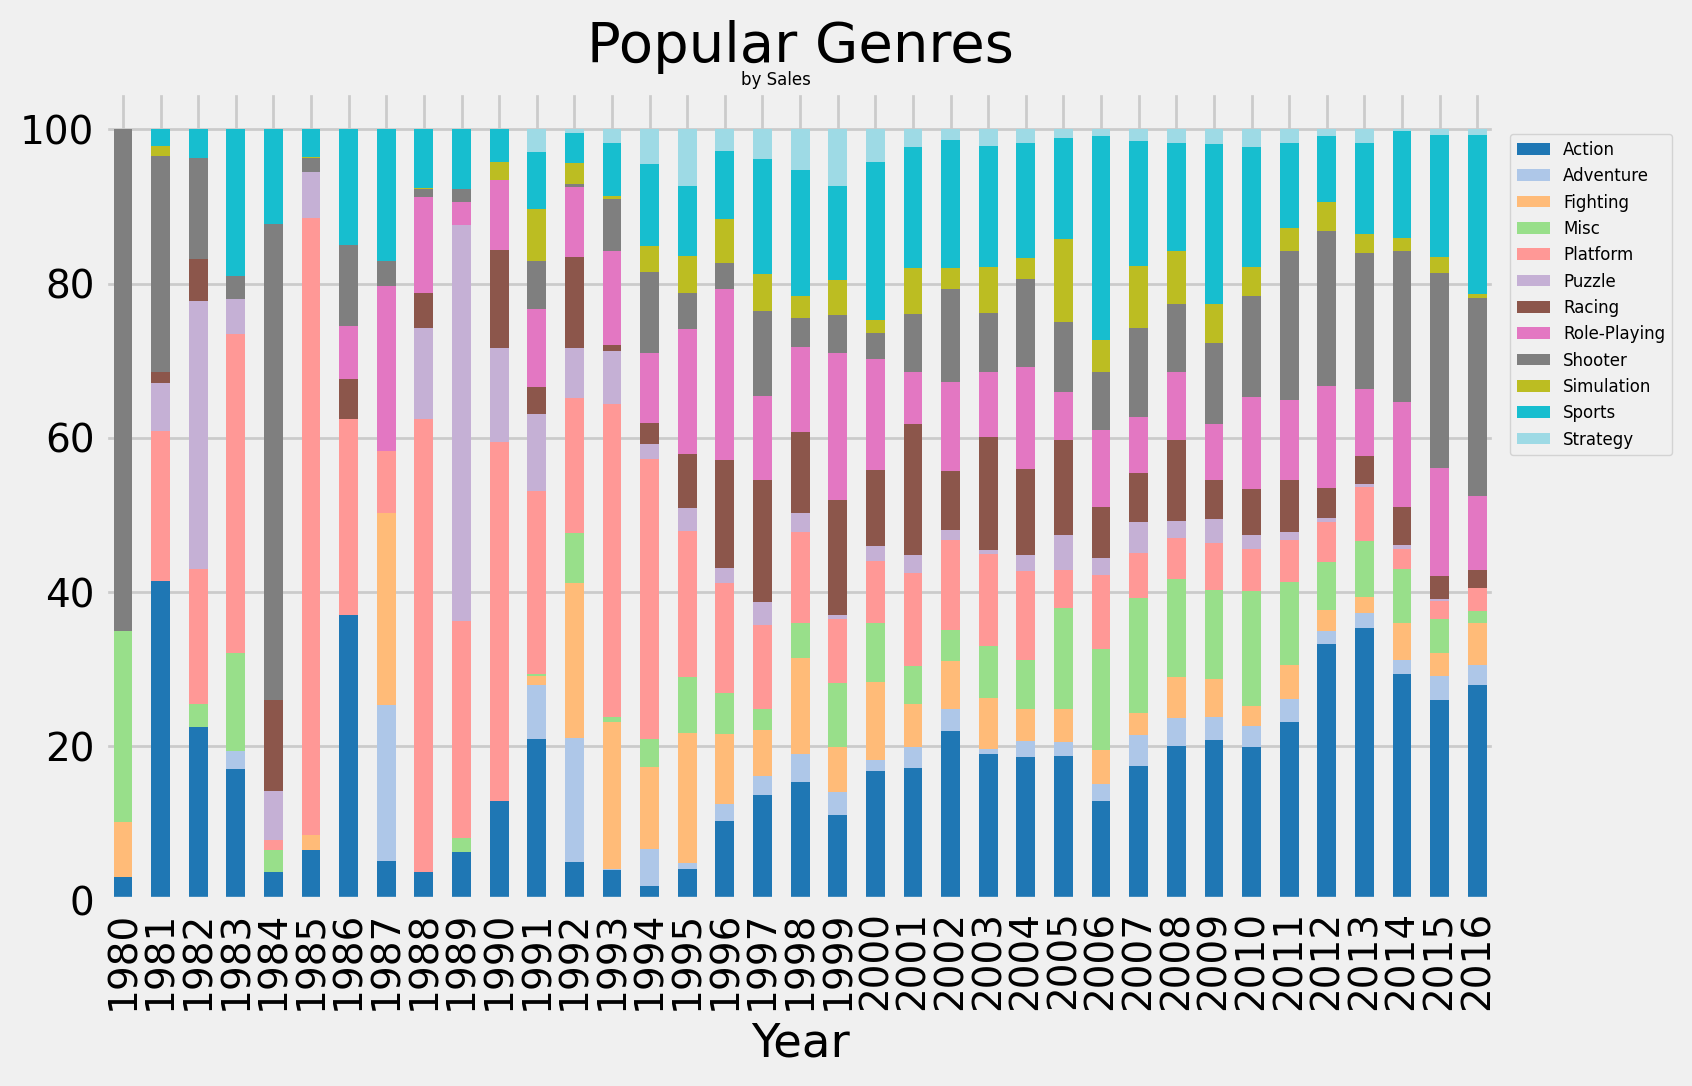

In [29]:
# game trends by year, stacked bar graph
# df_trends = df.groupby(["Year", "Genre"]).sum()
df_trends = df.drop(["NA_Sales",	"EU_Sales",	"JP_Sales",	"Other_Sales"], axis=1).groupby(["Year", "Genre"]).sum().reset_index(level=[0,1]).pivot(index='Year', columns='Genre', values='global_sales')
df_trends1 = df_trends.copy()
for i in range(len(df_trends)):
  df_trends.iloc[i] /= df_trends.iloc[i].sum()/100
df_trends.plot.bar(stacked=True, colormap="tab20")
plt.legend(loc=[1.01, 0.55], prop={'size': 6})
plt.title("Popular Genres", y=1.015)
plt.suptitle("by Sales",y=0.9 ,fontsize=6);

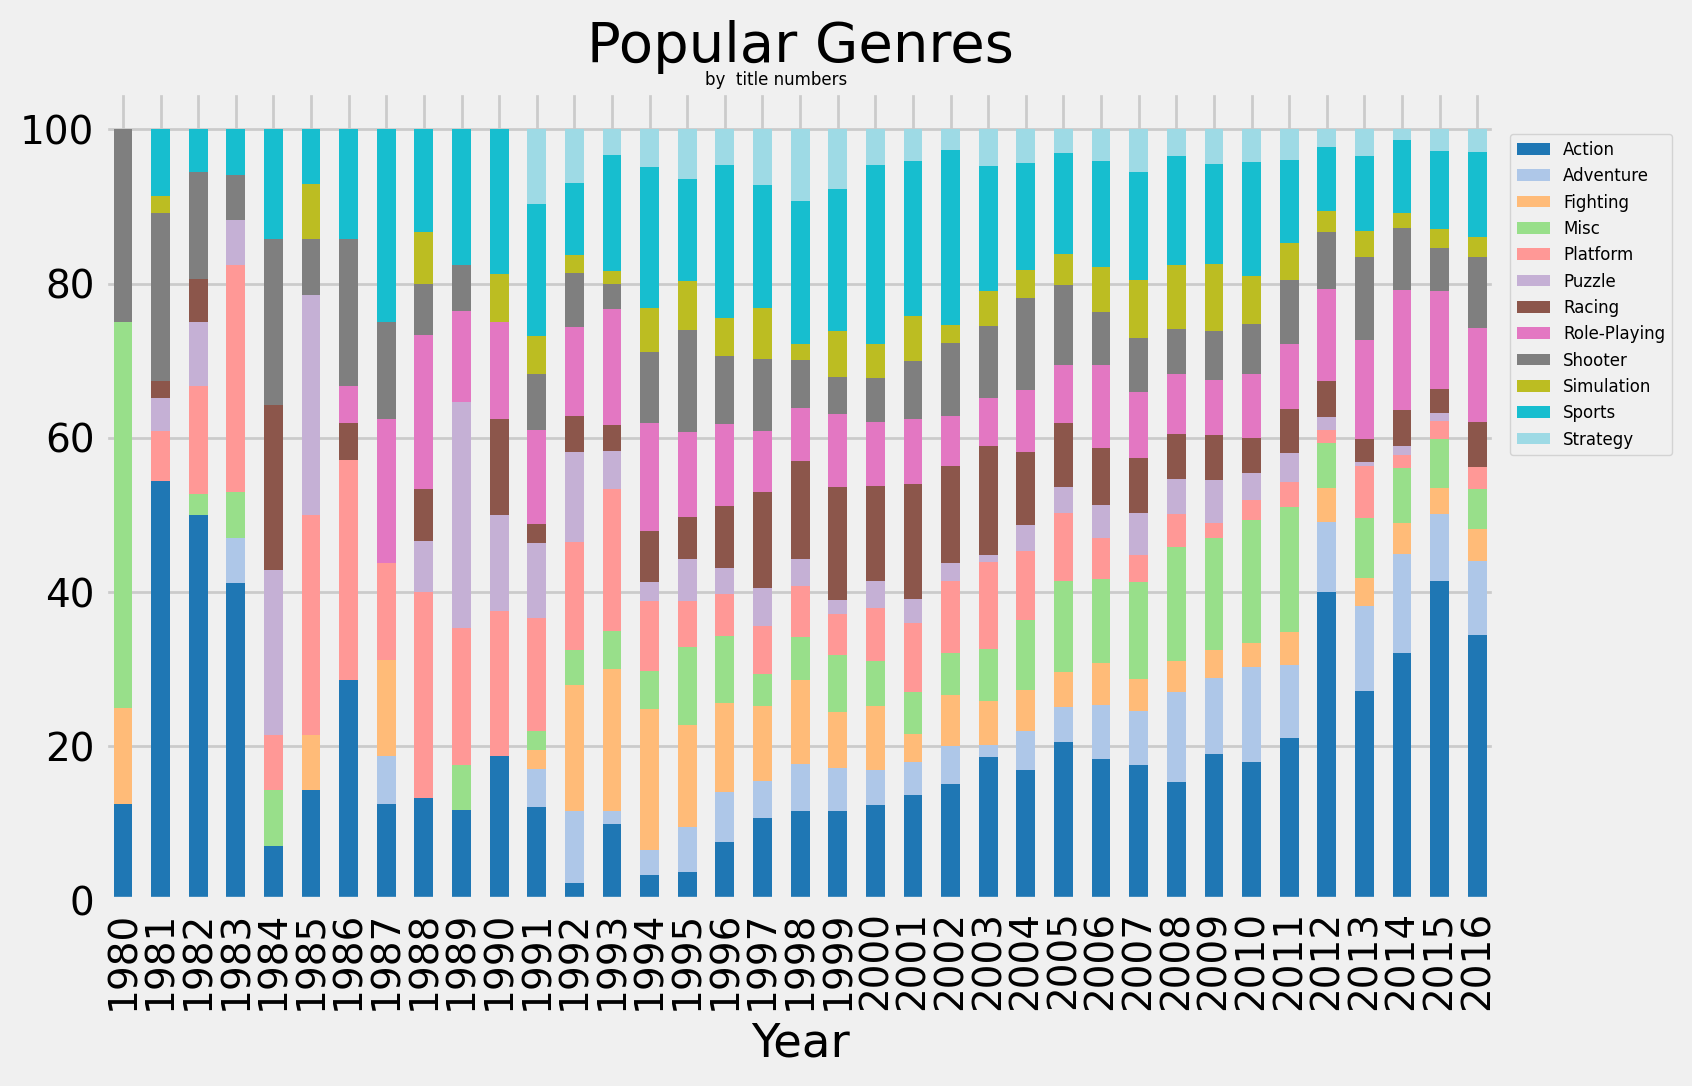

In [30]:
df_trends_count = df.groupby(["Year", "Genre"])["global_sales"].count().reset_index(level=[0,1]).pivot(index='Year', columns='Genre', values='global_sales')
for i in range(len(df_trends_count)):
  df_trends_count.iloc[i] /= df_trends_count.iloc[i].sum()/100
df_trends_count.plot.bar(stacked=True, colormap="tab20")
plt.legend(loc=[1.01, 0.55], prop={'size': 6})
plt.title("Popular Genres", y=1.015)
plt.suptitle("by  title numbers",y=0.9 ,fontsize=6);

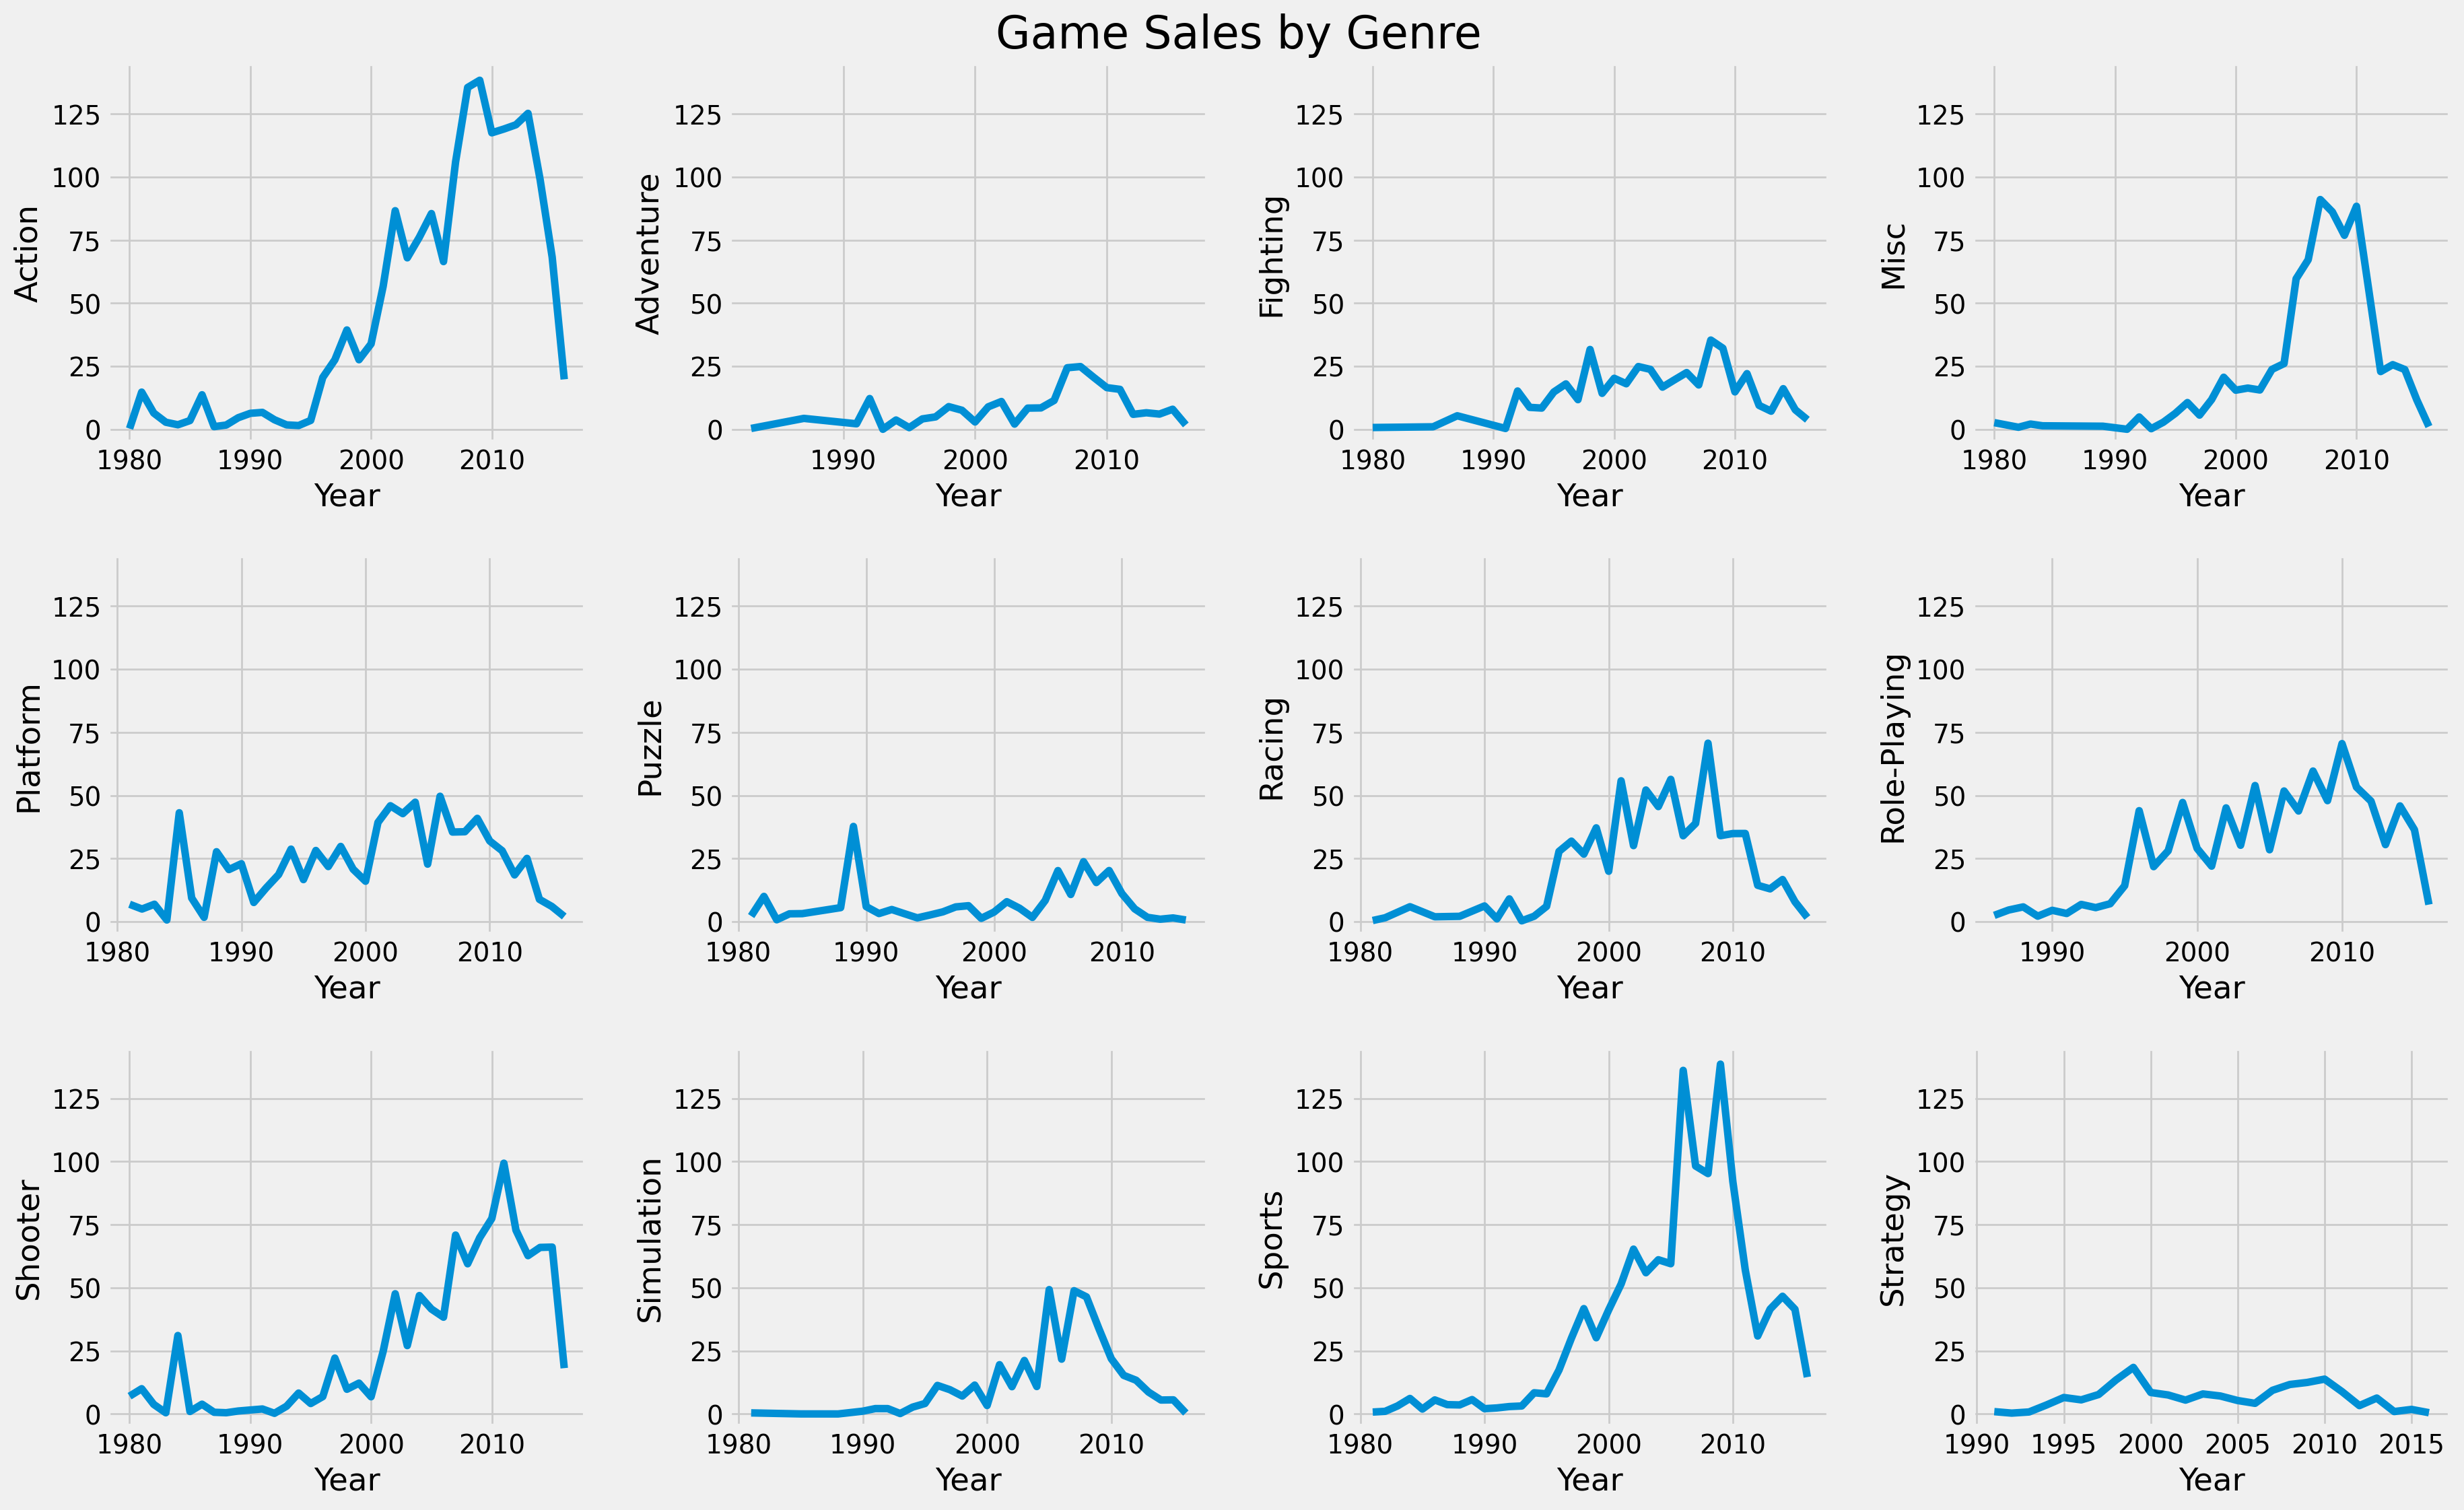

In [31]:
f, axes = plt.subplots(3, 4)
f.suptitle("Game Sales by Genre", fontsize=24, y=0.91)
f.set_size_inches((20, 12.5))
plt.subplots_adjust(wspace = 0.3, hspace = 0.3)

for i in range(12):
  axes[i//4, i%4].set_ylim([-5, 145])
  sns.lineplot(ax=axes[i//4, i%4], data=df_trends1.iloc[:, i])
plt.show()

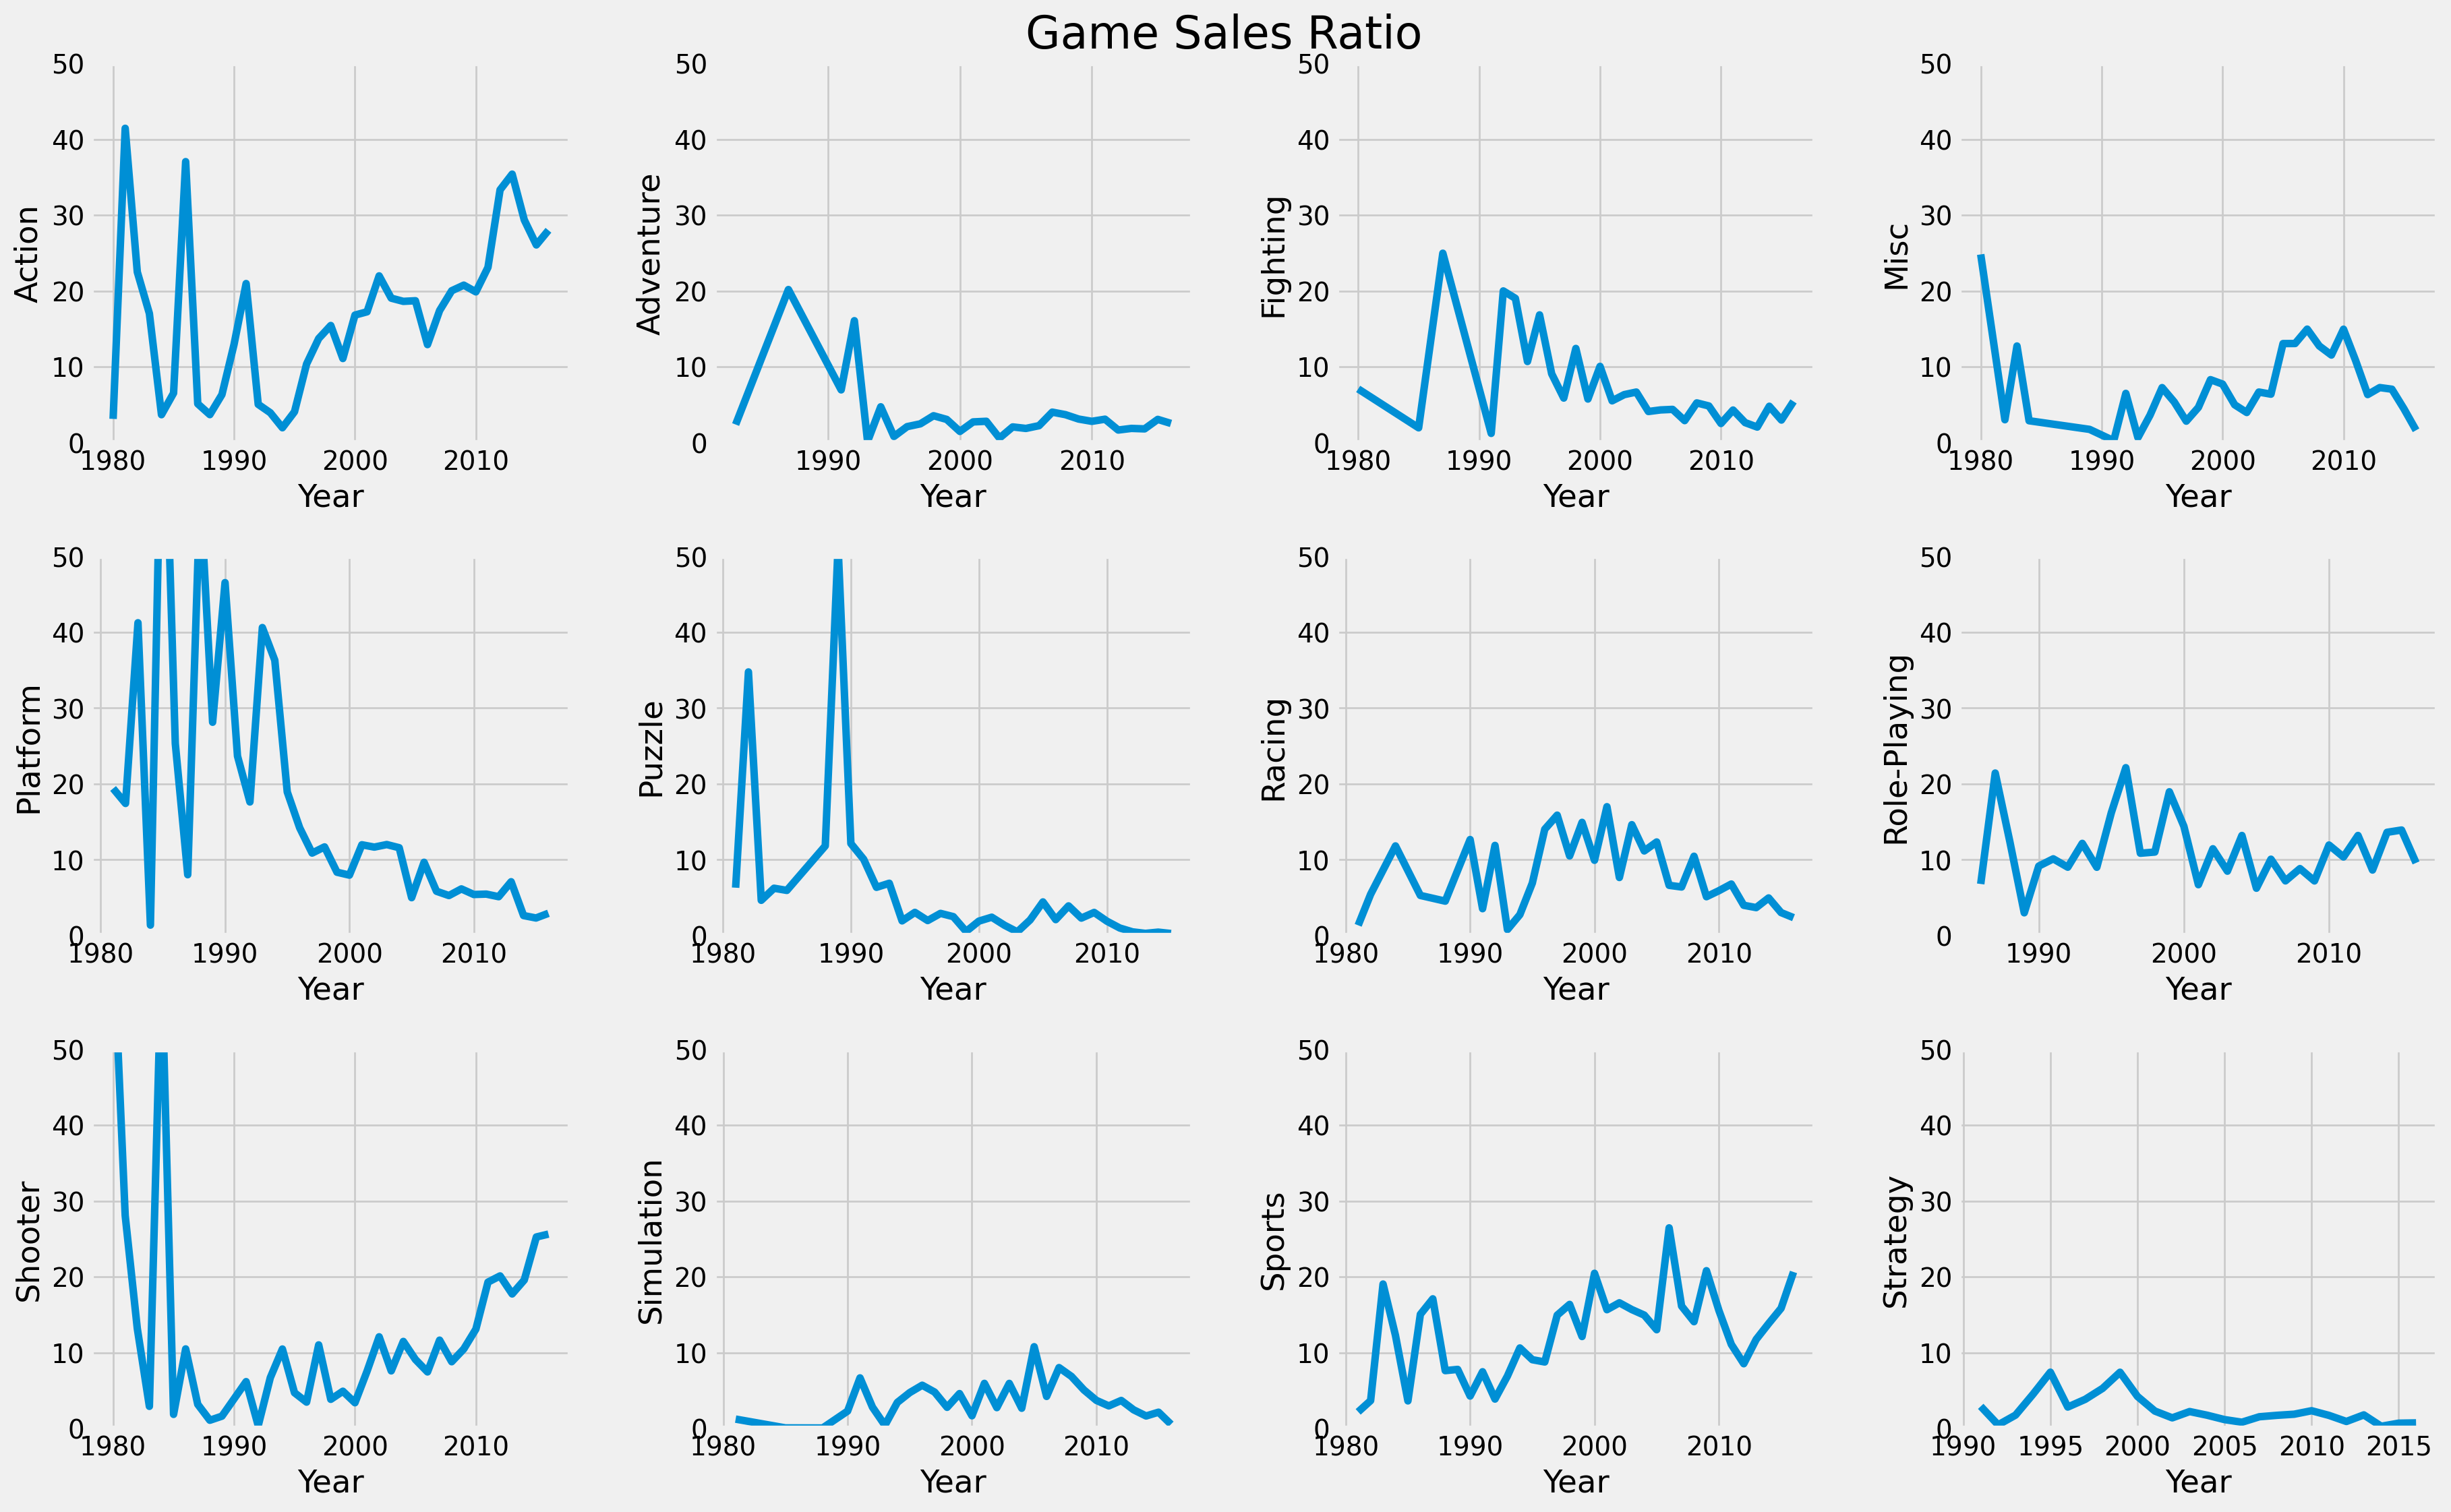

In [32]:
f, axes = plt.subplots(3, 4)
f.suptitle("Game Sales Ratio", fontsize=24, y=0.91)
f.set_size_inches((20, 12.5))
plt.subplots_adjust(wspace = 0.3, hspace = 0.3)

for i in range(12):
  axes[i//4, i%4].set_ylim([-0.01, 50])
  sns.lineplot(ax=axes[i//4, i%4], data=df_trends.iloc[:, i])
plt.show()

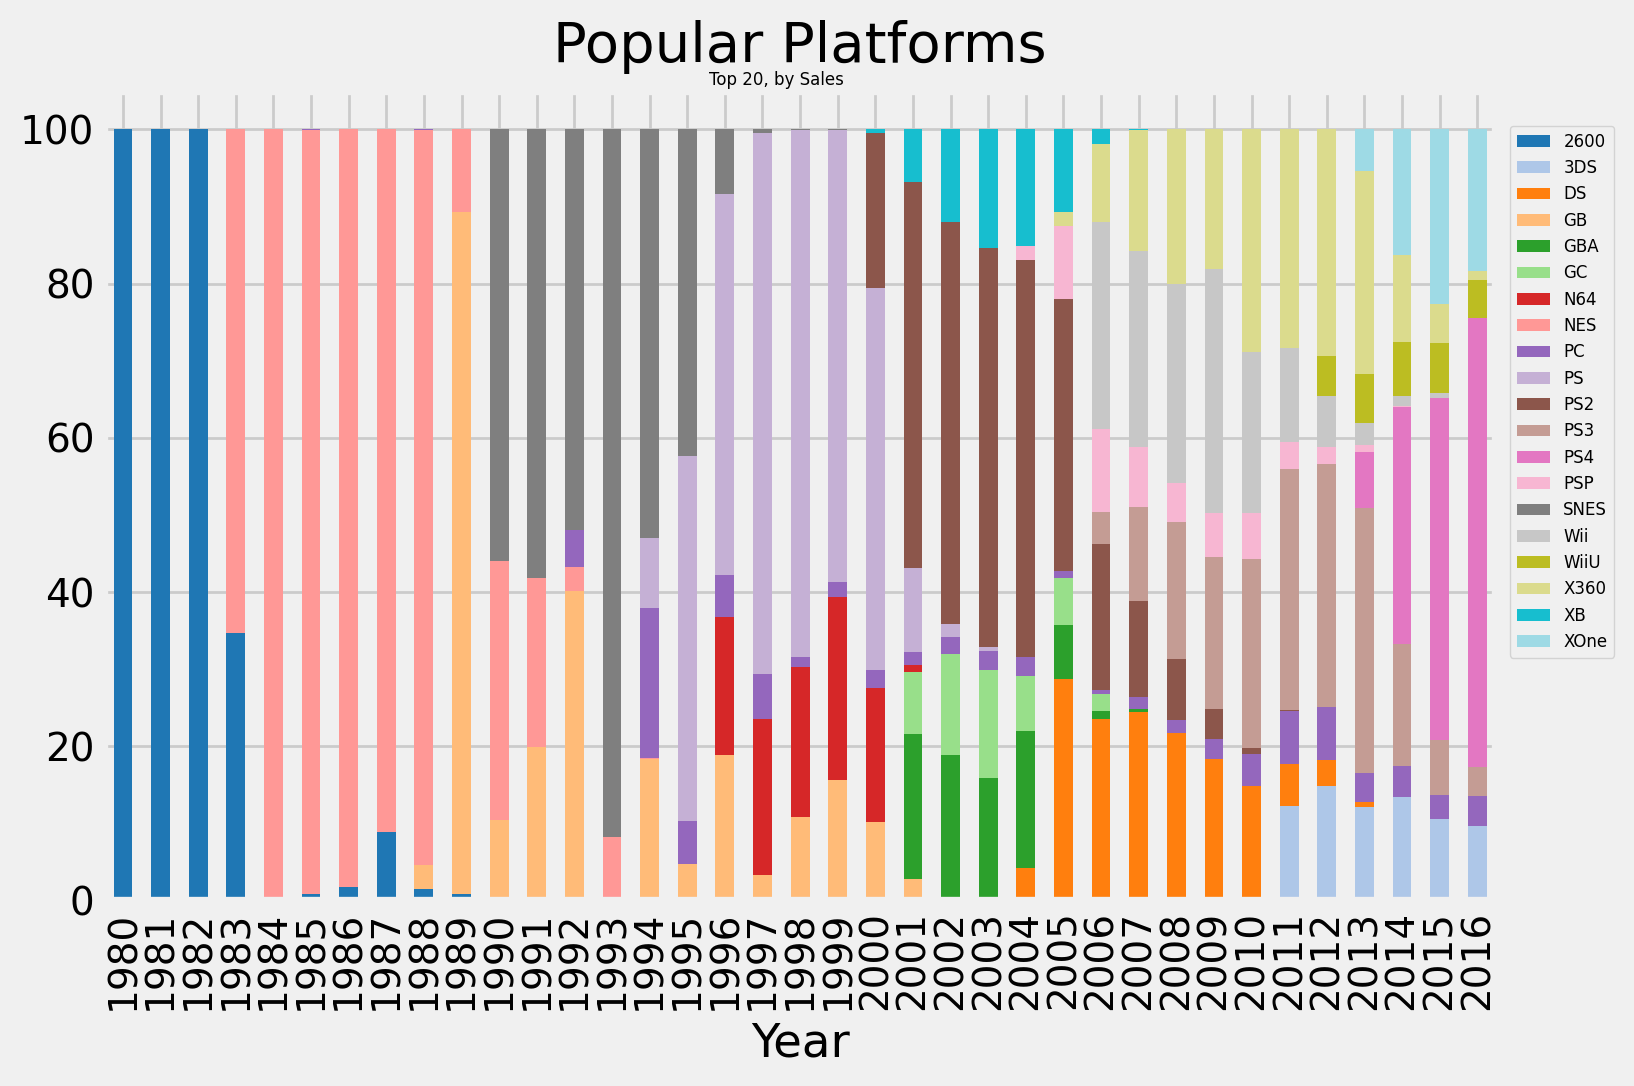

In [33]:
trend_idx_platform = df.groupby("Platform")["global_sales"].sum().sort_values(ascending=False).index[:20]
df_trends_platform = df.groupby(["Year", "Platform"])["global_sales"].sum().reset_index(level=[0,1]).pivot(index='Year', columns='Platform', values='global_sales')
for i in df_trends_platform.columns:
  if i not in trend_idx_platform:
    df_trends_platform.drop(i, axis=1, inplace=True)
for i in range(len(df_trends_platform)):
  df_trends_platform.iloc[i] /= df_trends_platform.iloc[i].sum()/100
df_trends_platform.plot.bar(stacked=True, colormap="tab20")
plt.title("Popular Platforms", y=1.015)
plt.suptitle("Top 20, by Sales",y=0.9 ,fontsize=6)
plt.legend(loc=[1.01, 0.3], prop={'size': 6});

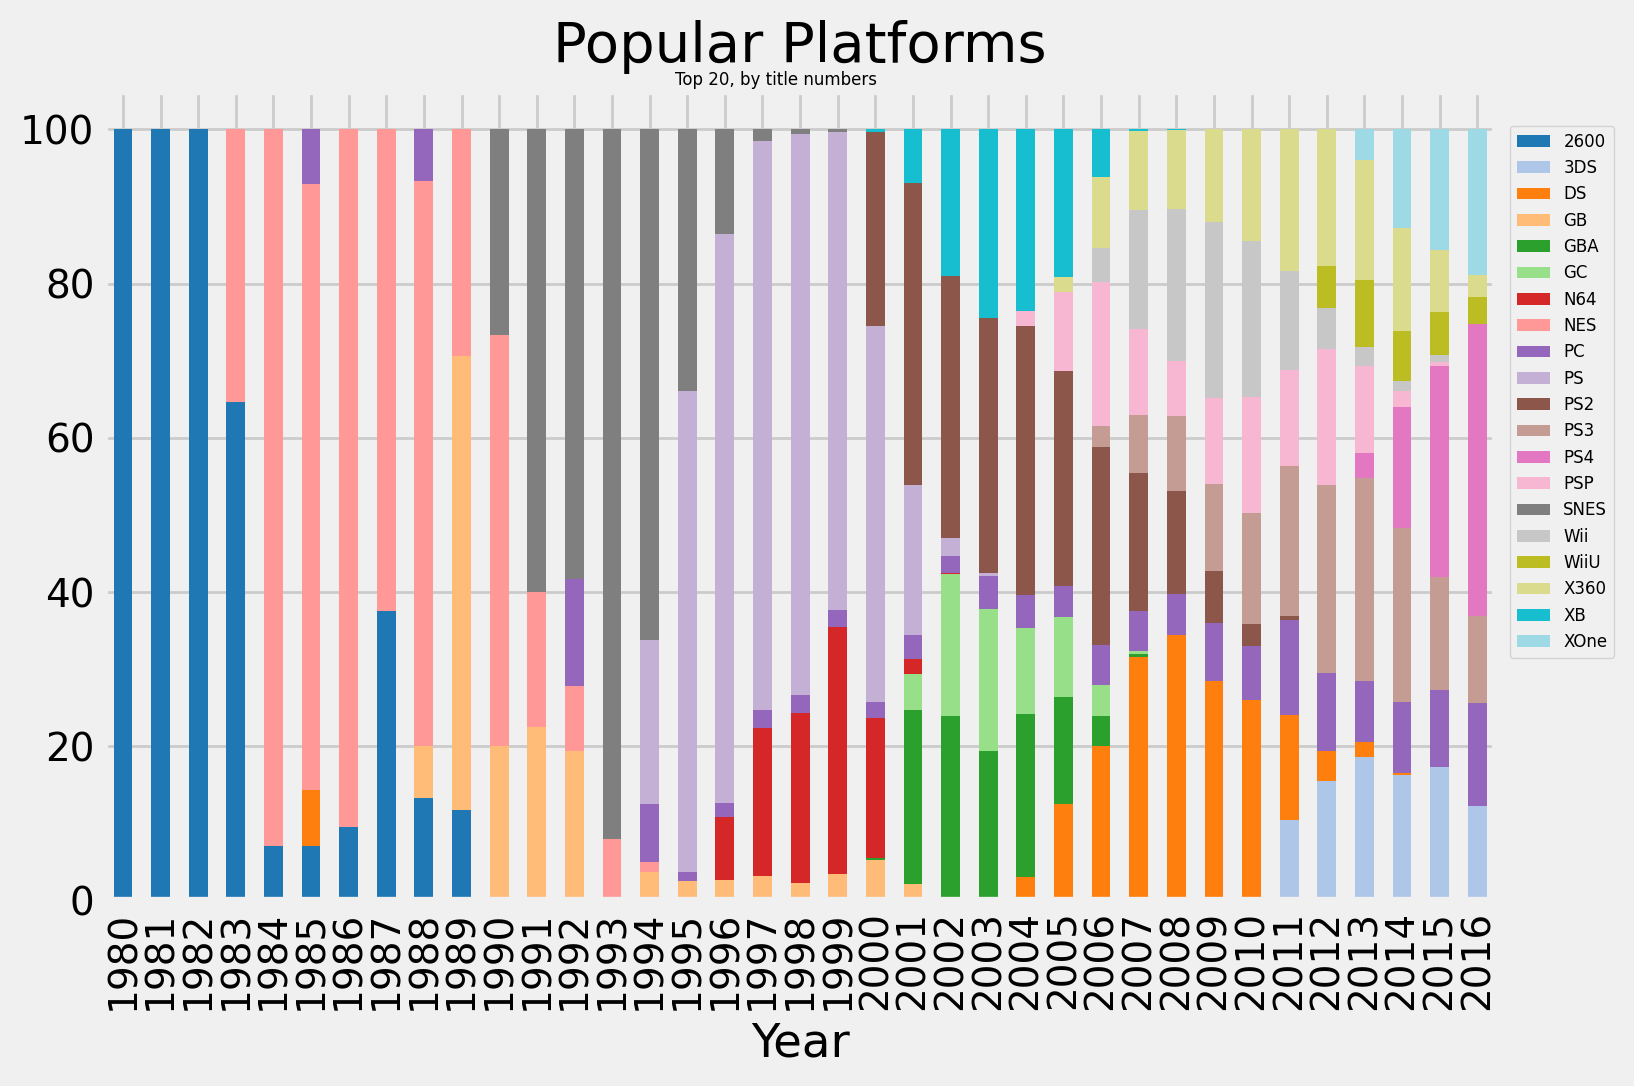

In [34]:
# trend_idx_platform_count = set()
df_trends_platform_count = df.groupby(["Year", "Platform"])["global_sales"].count().reset_index(level=[0,1]).pivot(index='Year', columns='Platform', values='global_sales')
# for i in range(len(df_trends_platform_count)):
#   trend_idx_platform_count.update(df_trends_platform_count.iloc[i].sort_values(ascending=False).index[:3])
# df_trends_platform_count.drop(["SAT", "SCD"], axis=1, inplace=True)
for i in df_trends_platform_count.columns:
  if i not in trend_idx_platform:
    df_trends_platform_count.drop(i, axis=1, inplace=True)
for i in range(len(df_trends_platform_count)):
  df_trends_platform_count.iloc[i] /= df_trends_platform_count.iloc[i].sum()/100
df_trends_platform_count.plot.bar(stacked=True, colormap="tab20")
plt.title("Popular Platforms", y=1.015)
plt.suptitle("Top 20, by title numbers",y=0.9 ,fontsize=6)
plt.legend(loc=[1.01, 0.3], prop={'size': 6});

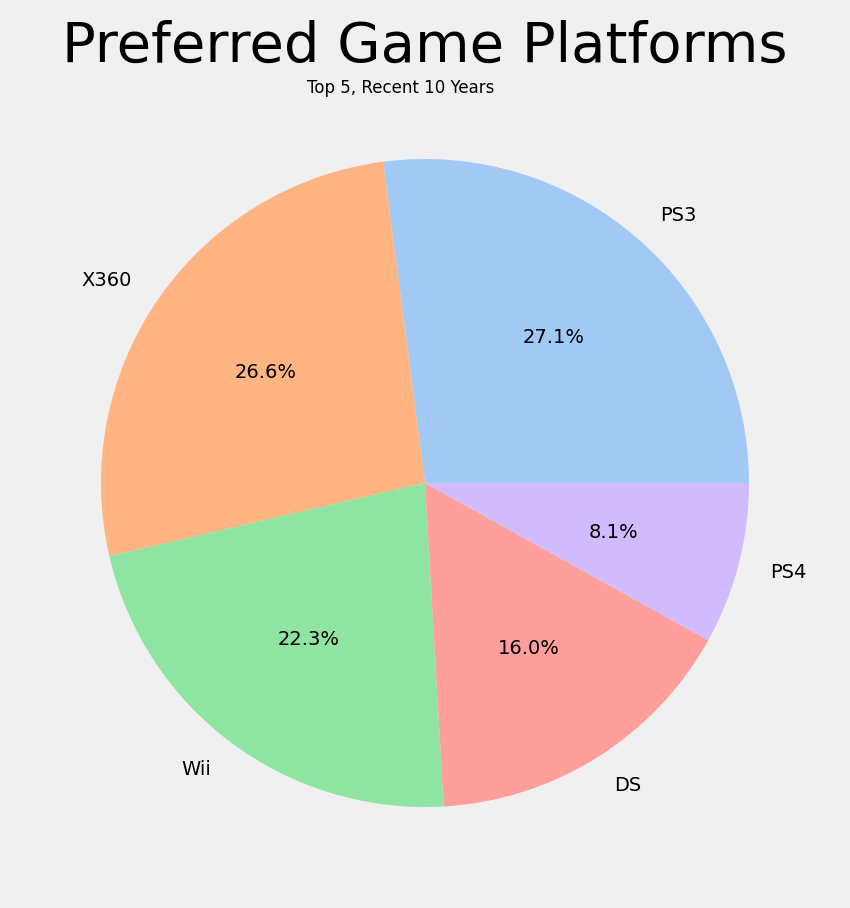

In [35]:
# top 5 platforms(recent 10 years)
pie_recent_platform = df_recent.groupby("Platform")["global_sales"].sum().sort_values(ascending=False)[:5]
plt.title("Preferred Game Platforms")
plt.suptitle("Top 5, Recent 10 Years", x=0.5, y=0.88, fontsize=6)
plt.pie(pie_recent_platform, labels=pie_recent_platform.index, autopct="%.1f%%", colors=sns.color_palette('pastel'), textprops={'fontsize': 7});

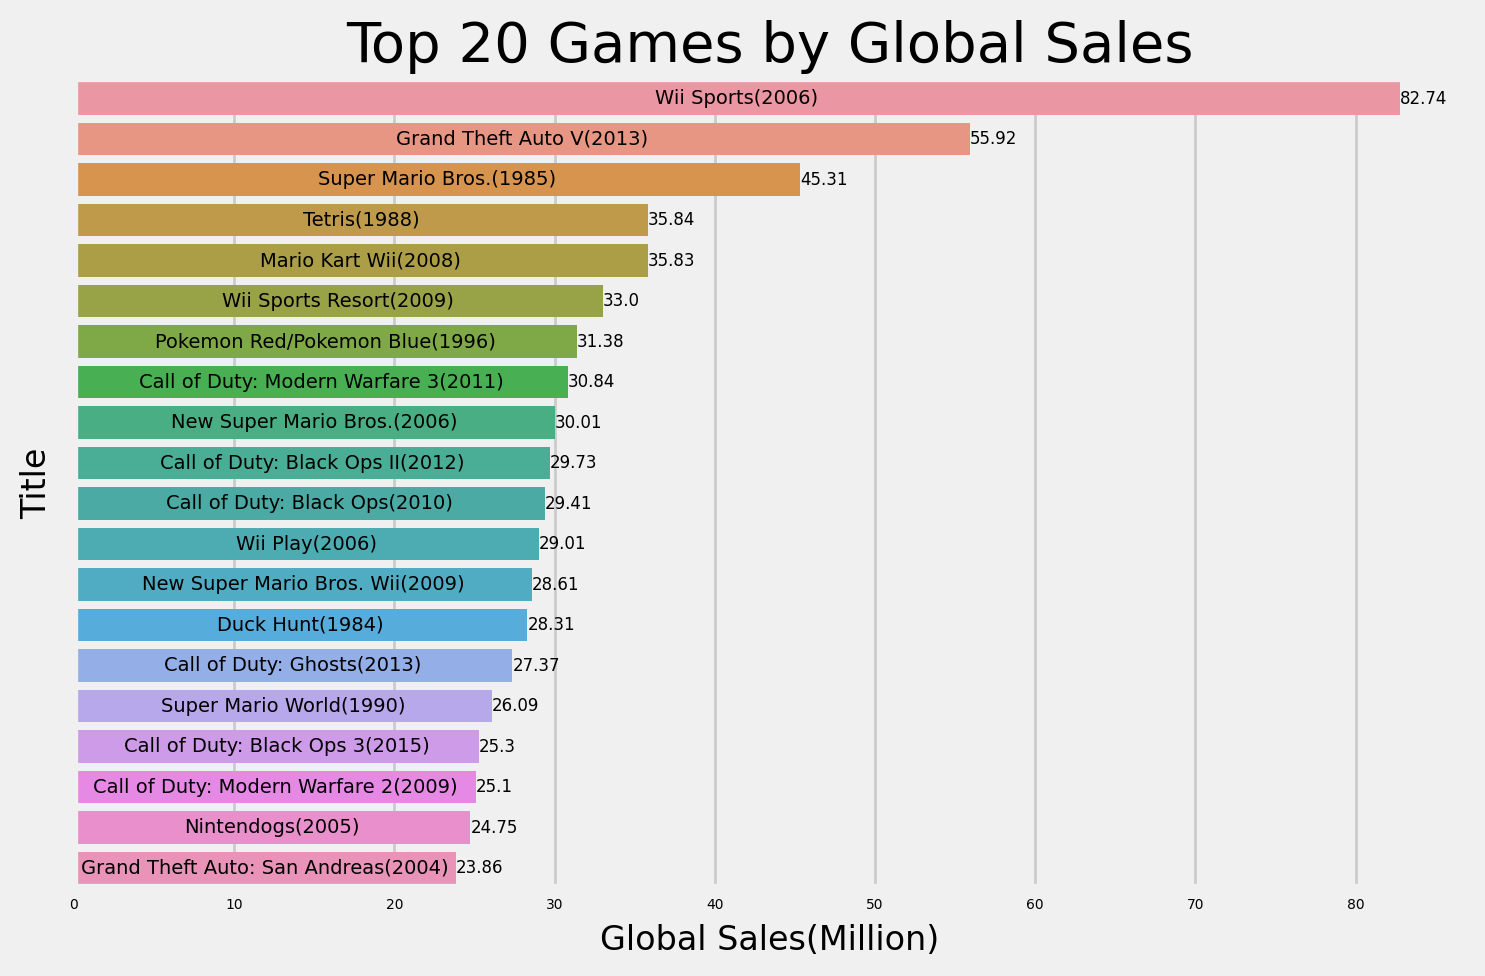

In [36]:
# top 20 games by global sales
df_top_games = num_of_platforms(df).sort_values(by="global_sales", ascending=False)[:20].reset_index(drop=True)
# for i in range(len(df_top_games)):
#   df_top_games.loc[i, "Year"] = df[df["Name"]==df_top_games.loc[i, "Name"]]["Year"].min()
#   df_top_games.loc[i, "num_of_platforms"] = df[df["Name"]==df_top_games.loc[i, "Name"]].shape[0]
df_top_games["Year"] = df_top_games.Year.astype(str)
df_top_games["num_of_platforms"] = df_top_games.num_of_platforms.astype(str)
ax = sns.barplot(data=df_top_games, y="Name", x="global_sales")
ax.set_title("Top 20 Games by Global Sales")
ax.set_ylabel("Title", fontsize=12)
ax.set_xlabel("Global Sales(Million)", fontsize=12)
# print(dir(ax))
for i, row in df_top_games.iterrows():
  ax.text(x=row.global_sales/2, y=i, s=row.Name+"("+row.Year+")", fontsize=7, ha="center", va="center")
  ax.text(x=row.global_sales, y=i, s=row.global_sales.__round__(2), fontsize=6, ha="left", va="center")
plt.xticks(fontsize=5)
ax.set_yticklabels([""]*len(df_top_games));

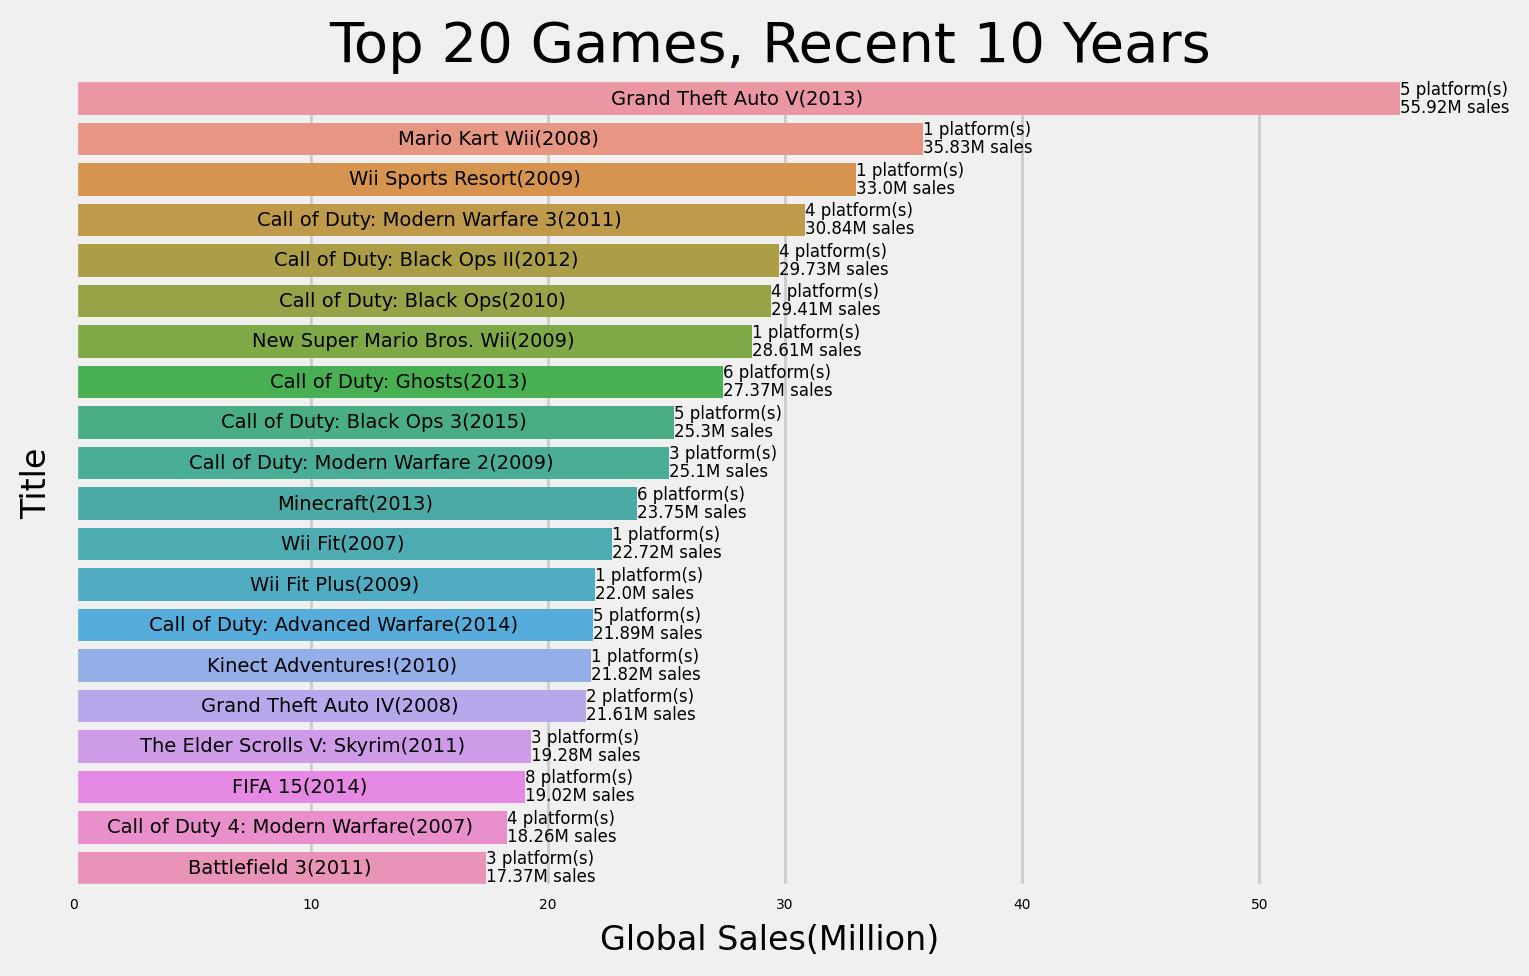

In [37]:
# top 20 games by global sales, recent 10 years
df_top_games_recent = num_of_platforms(df_recent).sort_values(by="global_sales", ascending=False)[:20].reset_index(drop=True)
# for i in range(len(df_top_games_recent)):
#   df_top_games_recent.loc[i, "Year"] = df_recent[df_recent["Name"]==df_top_games_recent.loc[i, "Name"]]["Year"].min()
#   df_top_games_recent.loc[i, "num_of_platforms"] = df_recent[df_recent["Name"]==df_top_games_recent.loc[i, "Name"]].shape[0]
df_top_games_recent["Year"] = df_top_games_recent.Year.astype(str)
df_top_games_recent["num_of_platforms"] = df_top_games_recent.num_of_platforms.astype(str)

ax = sns.barplot(data=df_top_games_recent, y="Name", x="global_sales")
ax.set_title("Top 20 Games, Recent 10 Years")
ax.set_ylabel("Title", fontsize=12)
ax.set_xlabel("Global Sales(Million)", fontsize=12)

for i, row in df_top_games_recent.iterrows():
  ax.text(x=row.global_sales/2, y=i, s=row.Name+"("+row.Year+")", fontsize=7, ha="center", va="center")
  ax.text(x=row.global_sales, y=i, s=str(row.global_sales.__round__(2))+"M sales", fontsize=6, ha="left", va="top")
  ax.text(x=row.global_sales, y=i, s=row.num_of_platforms+" platform(s)", fontsize=6, ha="left", va="bottom")
plt.xticks(fontsize=5)
ax.set_yticklabels([""]*len(df_top_games_recent));

In [38]:
# every single-platform games are developed by 1st party studio.
# if we want to maximize our sales, we must develop our game in cross-platform

In [39]:
df_4 = df[df.Year >= 2013]
df_5 = df[df.Year >= 2012]
df_4

Name Platform  Year  \
17                  Hajime no Ippo: The Fighting! (2014)      PS3  2014   
18                                         Grand Kingdom      PS4  2015   
23                                Don Bradman Cricket 14     X360  2014   
24                              Injustice: Gods Among Us      PS3  2013   
32     Mario & Luigi: Paper Jam & Mario Kart 7 Double...      3DS  2015   
...                                                  ...      ...   ...   
16219                                 Grand Theft Auto V       PC  2015   
16220                                   Yoru no Nai Kuni      PS4  2015   
16225                                    LEGO The Hobbit     XOne  2014   
16238                                           NBA 2K16      PS3  2015   
16239                        Toukiden: The Age of Demons      PSV  2013   

              Genre                               Publisher  NA_Sales  \
17           Sports                      Namco Bandai Games      0.00   
18     Role-Playing                    Nippon Ichi Software      0.02   
23           Sports                   Tru Blu Entertainment      0.00   
24         Fighting  Warner Bros. Interactive Entertainment      0.48   
32             Misc                                Nintendo      0.00   
...             ...                                     ...       ...   
16219        Action                    Take-Two Interactive      0.36   
16220  Role-Playing                              Tecmo Koei      0.00   
16225        Action  Warner Bros. Interactive Entertainment      0.13   
16238        Sports                    Take-Two Interactive      0.44   
16239        Action                              Tecmo Koei      0.05   

       EU_Sales  JP_Sales  Other_Sales  global_sales  
17         0.00      0.03         0.00          0.03  
18         0.00      0.03         0.00          0.05  
23         0.01      0.00         0.00          0.01  
24         0.53      0.01         0.23          1.25  
32         0.00      0.01         0.00          0.01  
...         ...       ...          ...           ...  
16219      0.64      0.00         0.08          1.08  
16220      0.00      0.08         0.00          0.08  
16225      0.12      0.00         0.02          0.27  
16238      0.19      0.03         0.13          0.79  
16239      0.05      0.25         0.03          0.38  

[2081 rows x 10 columns]

In [40]:
num_of_platforms(df).info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11297 entries, 0 to 11296
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Name              11297 non-null  object 
 1   Year              11297 non-null  int64  
 2   NA_Sales          11297 non-null  float64
 3   EU_Sales          11297 non-null  float64
 4   JP_Sales          11297 non-null  float64
 5   Other_Sales       11297 non-null  float64
 6   global_sales      11297 non-null  float64
 7   num_of_platforms  11297 non-null  int64  
 8   Genre             11297 non-null  object 
dtypes: float64(5), int64(2), object(2)
memory usage: 794.4+ KB


In [41]:
df_plat = [num_of_platforms(df), num_of_platforms(df_recent), num_of_platforms(df_5)]
for i in range(3):
  df_plat[i] = df_plat[i][["num_of_platforms", "global_sales"]]
df_plat_corr = [np.corrcoef(i.T)[0,1] for i in df_plat]
df_plat_corr

[0.3289765984552019, 0.40549609578573637, 0.46569465134834515]

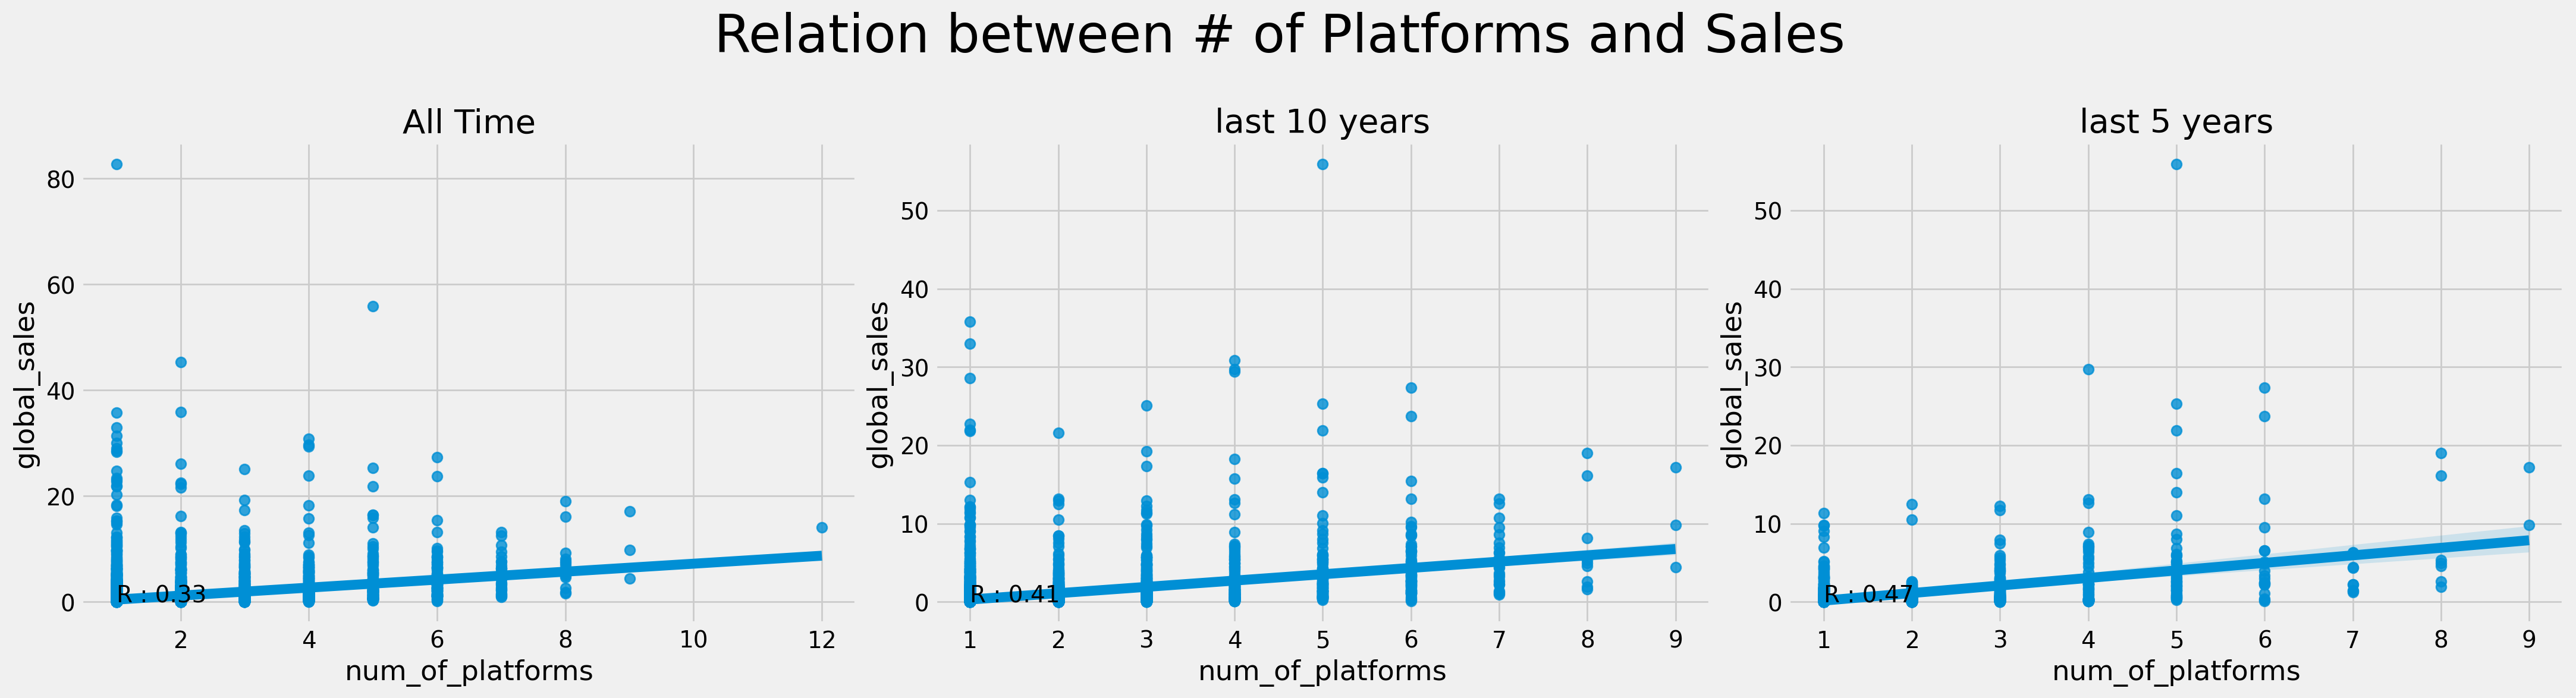

In [47]:
f, axes = plt.subplots(1, 3)
f.suptitle("Relation between # of Platforms and Sales", fontsize=32, y=1.1, x=0.5)
f.set_size_inches((24, 5))
plt.subplots_adjust(wspace = 0.1, hspace = 0.1)

for i in range(3):
  sns.regplot(data=(df_plat[i]), x="num_of_platforms", y="global_sales", ax=axes[i])
  axes[i].text(s="R : "+str(df_plat_corr[i].__round__(2)), x=1, y=0)
axes[0].set_title("All Time")
axes[1].set_title("last 10 years")
axes[2].set_title("last 5 years");

In [43]:
from collections import defaultdict
company = defaultdict(list)
for s in df_5.Platform.unique():
  if "PS" in s:
    company["Sony"].append(s)
  elif ("X" in s) or (s == "PC"):
    company["Microsoft"].append(s)
  else:
    company["Nintendo"].append(s)


def get_swap_dict(d):
    return {i: k for k, v in d.items() for i in v}


company = get_swap_dict(company)
company_color = ["tab:green", "tab:red", "tab:blue"]

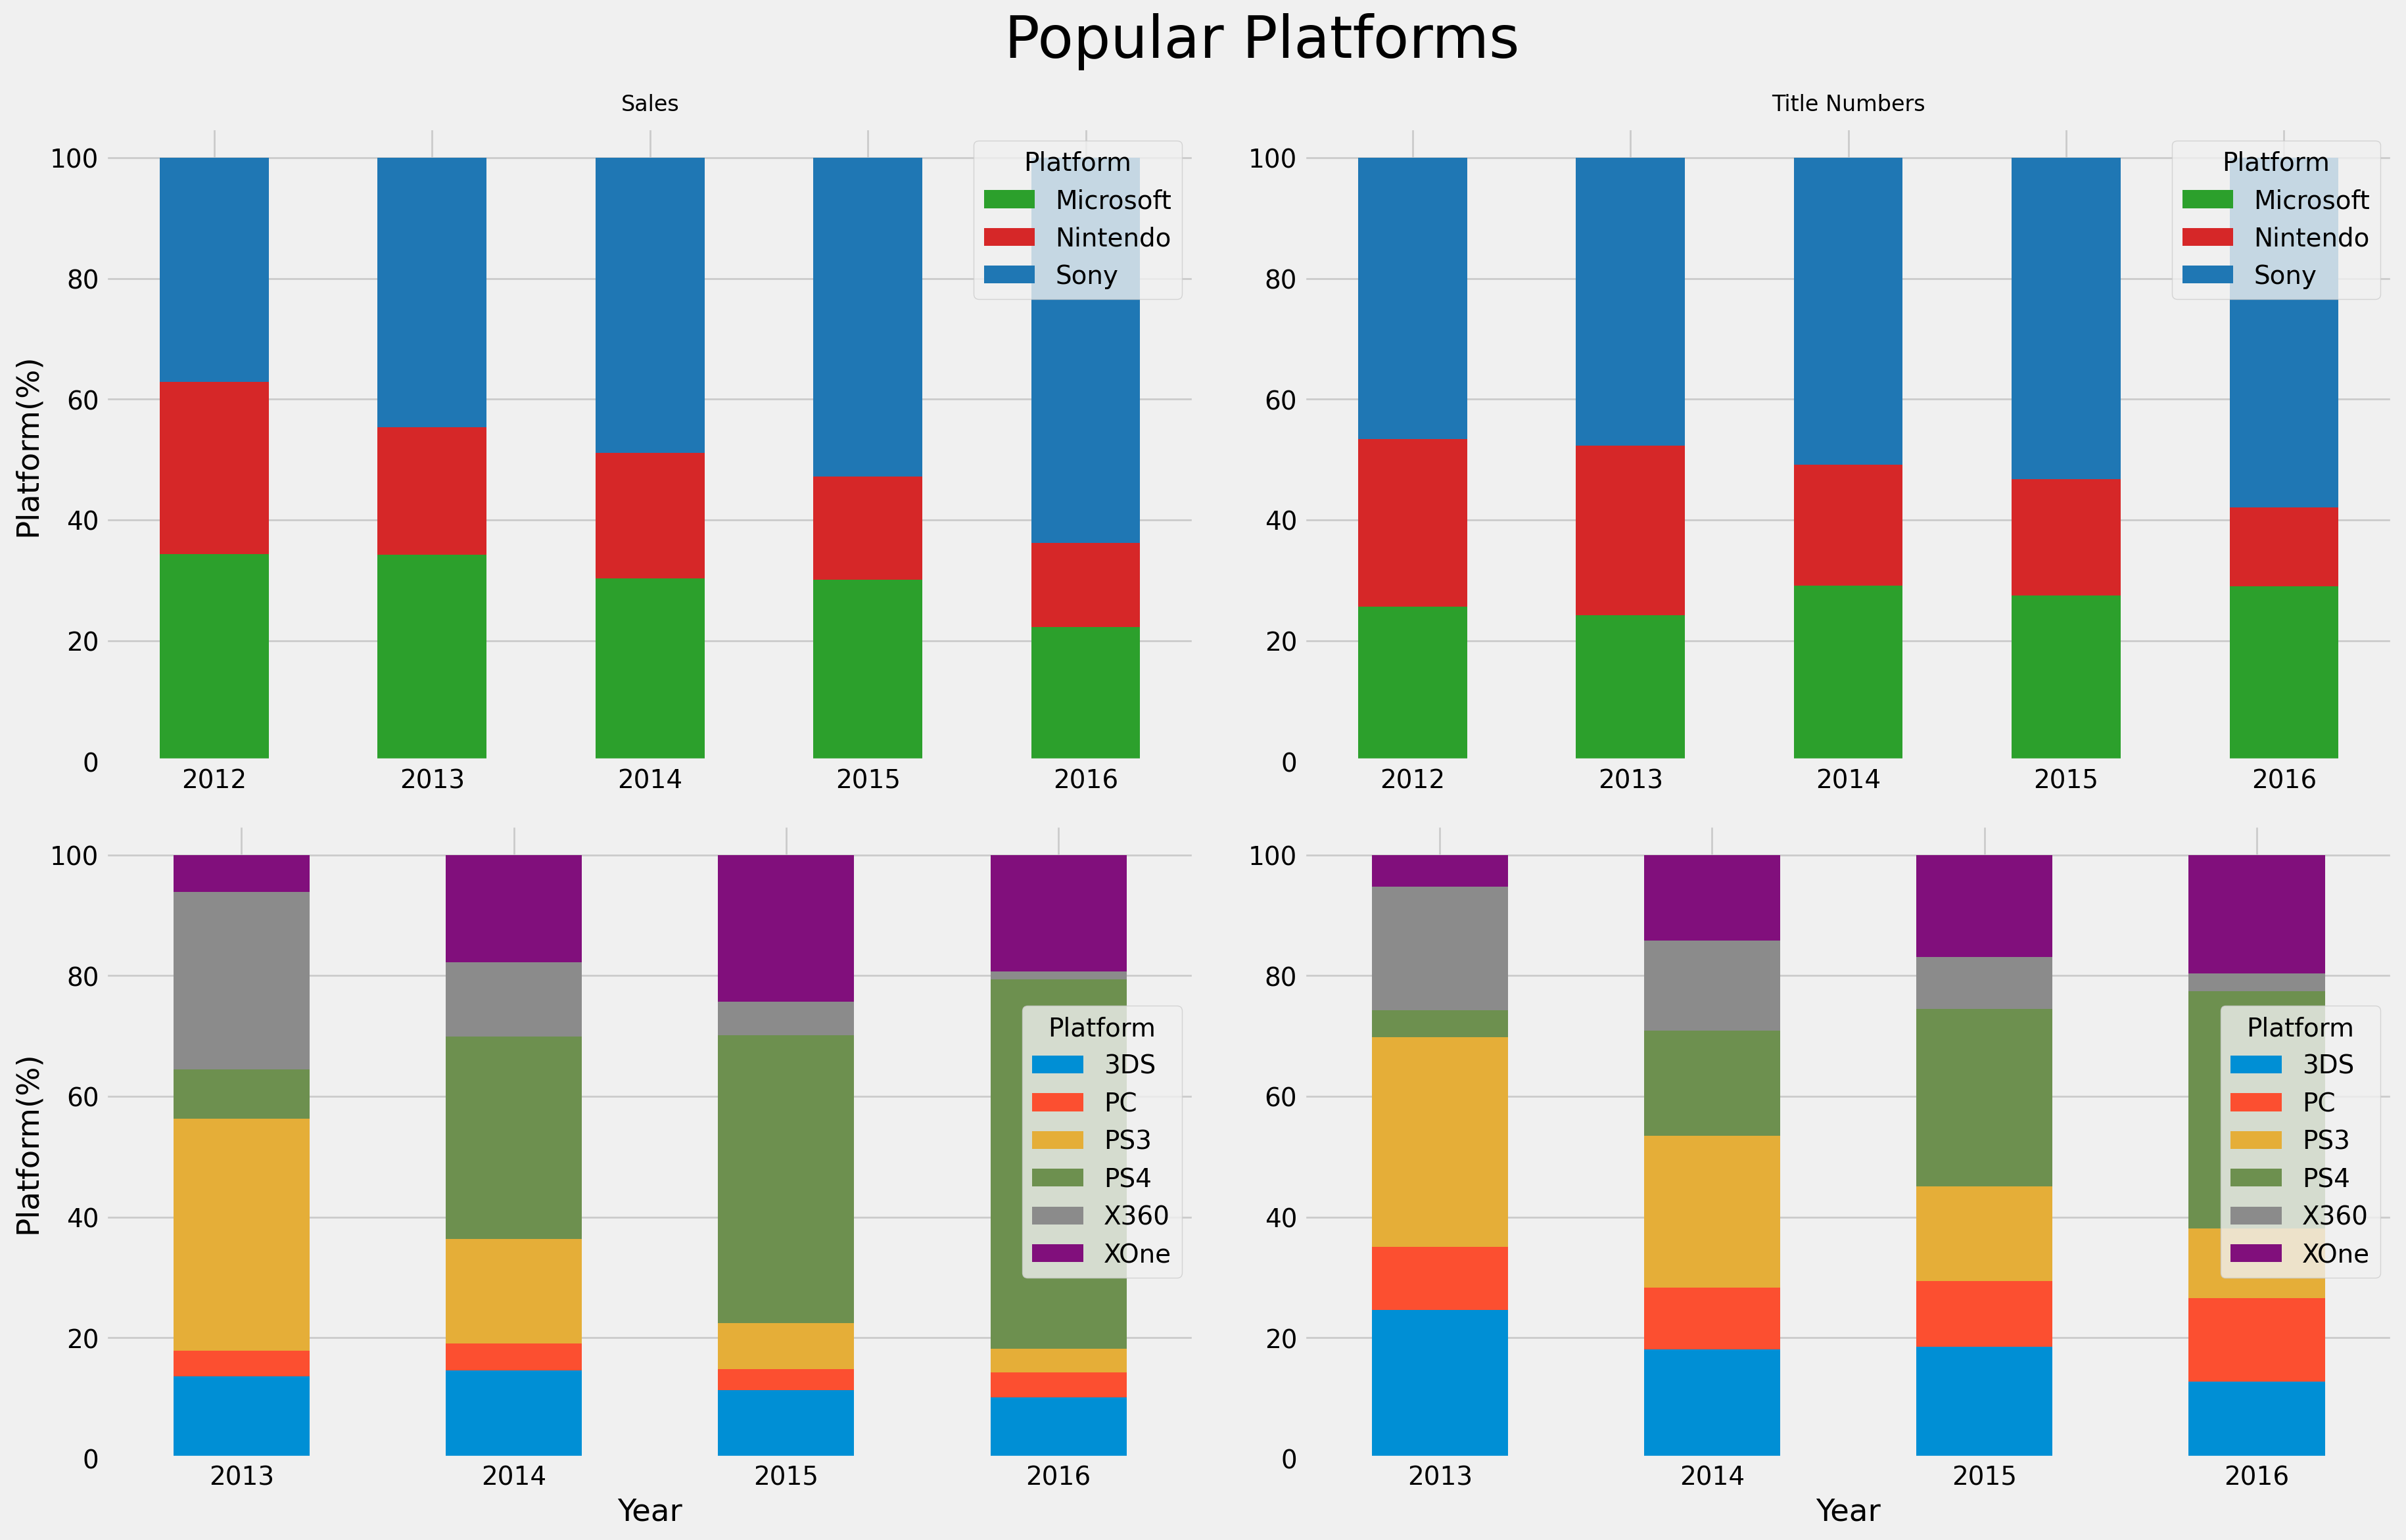

In [44]:
f, axes = plt.subplots(2, 2)
f.suptitle("Popular Platforms", fontsize=32, y=0.95, x=0.52)
f.set_size_inches((20, 12.5))
plt.subplots_adjust(wspace = 0.1, hspace = 0.1)


df_5_trend_com = df_5.replace({"Platform":company}).groupby(["Year", "Platform"]).sum().global_sales.reset_index(level=[0,1])
df_5_trend_com_pivot = df_5_trend_com.pivot(index='Year', columns='Platform', values='global_sales')
for i in range(len(df_5_trend_com_pivot)):
  df_5_trend_com_pivot.iloc[i] /= df_5_trend_com_pivot.iloc[i].sum()/100
df_5_trend_com_pivot.plot.bar(ax=axes[0, 0], stacked=True, color=company_color)
axes[0, 0].set_title("Sales",y=1.01 ,fontsize=12)
axes[0, 0].set_xticklabels(axes[0, 0].get_xticklabels(), rotation=0)
axes[0, 0].set_ylabel("Platform(%)")
axes[0, 0].set_xlabel("")

df_5_trend_com = df_5.replace({"Platform":company}).groupby(["Year", "Platform"]).count().global_sales.reset_index(level=[0,1])
df_5_trend_com_pivot = df_5_trend_com.pivot(index='Year', columns='Platform', values='global_sales')
for i in range(len(df_5_trend_com_pivot)):
  df_5_trend_com_pivot.iloc[i] /= df_5_trend_com_pivot.iloc[i].sum()/100
df_5_trend_com_pivot.plot.bar(ax=axes[0, 1], stacked=True, color=company_color)
axes[0, 1].set_title("Title Numbers",y=1.01 ,fontsize=12)
axes[0, 1].set_xticklabels(axes[0, 1].get_xticklabels(), rotation=0)
axes[0, 1].set_ylabel("")
axes[0, 1].set_xlabel("")

df_4_trend = df_4.groupby(["Year", "Platform"]).sum().global_sales.reset_index(level=[0,1]).sort_values(by="global_sales", ascending=False)
tmp = ["PS4", "PS3", "X360", "XOne", "PC", "3DS"]
df_4_trend_top5 = df_4_trend.query('Platform in @tmp')
df_4_trend_top5_pivot = df_4_trend_top5.pivot(index='Year', columns='Platform', values='global_sales')
for i in range(len(df_4_trend_top5_pivot)):
  df_4_trend_top5_pivot.iloc[i] /= df_4_trend_top5_pivot.iloc[i].sum()/100
df_4_trend_top5_pivot.plot.bar(ax=axes[1, 0], stacked=True)
axes[1, 0].set_xticklabels(axes[1, 0].get_xticklabels(), rotation=0)
axes[1, 0].set_ylabel("Platform(%)")

df_4_trend_cnt = df_4.groupby(["Year", "Platform"]).count().global_sales.reset_index(level=[0,1]).sort_values(by="global_sales", ascending=False)
tmp = ["PS4", "PS3", "X360", "XOne", "PC", "3DS"]
df_4_trend_cnt_top5 = df_4_trend_cnt.query('Platform in @tmp')
df_4_trend_cnt_top5_pivot = df_4_trend_cnt_top5.pivot(index='Year', columns='Platform', values='global_sales')
for i in range(len(df_4_trend_cnt_top5_pivot)):
  df_4_trend_cnt_top5_pivot.iloc[i] /= df_4_trend_cnt_top5_pivot.iloc[i].sum()/100
df_4_trend_cnt_top5_pivot.plot.bar(ax=axes[1, 1], stacked=True)
axes[1, 1].set_xticklabels(axes[1,1].get_xticklabels(), rotation=0)
axes[1, 1].set_ylabel("")
# plt.legend(loc=[1.01, 0.55])

plt.show;

In [46]:
df[df.Year < 1991].sort_values(by="global_sales", ascending=False)

Name Platform  Year       Genre  \
4113                     Super Mario Bros.      NES  1985    Platform   
1187                                Tetris       GB  1989      Puzzle   
10280                            Duck Hunt      NES  1984     Shooter   
12837                    Super Mario World     SNES  1990    Platform   
9307                      Super Mario Land       GB  1989    Platform   
...                                    ...      ...   ...         ...   
6159                        Super Baseball     2600  1987      Sports   
5962                    Adventures of Lolo      NES  1989      Puzzle   
9376                             Alter Ego       PC  1985  Simulation   
9357                               SimCity       PC  1988  Simulation   
8568   Strongest Tokyo University Shogi DS       DS  1985      Action   

            Publisher  NA_Sales  EU_Sales  JP_Sales  Other_Sales  global_sales  
4113         Nintendo     29.08      3.58      6.81         0.77         40.24  
1187         Nintendo     23.20      2.26      4.22         0.58         30.26  
10280        Nintendo     26.93      0.63      0.28         0.47         28.31  
12837        Nintendo     12.78      3.75      3.54         0.55         20.62  
9307         Nintendo     10.83      2.71      4.18         0.42         18.14  
...               ...       ...       ...       ...          ...           ...  
6159            Atari      0.07      0.00      0.00         0.00          0.07  
5962   HAL Laboratory      0.06      0.00      0.00         0.00          0.06  
9376       Activision      0.00      0.03      0.00         0.01          0.04  
9357            Maxis      0.00      0.02      0.00         0.01          0.03  
8568            Mycom      0.00      0.00      0.02         0.00          0.02  

[220 rows x 10 columns]

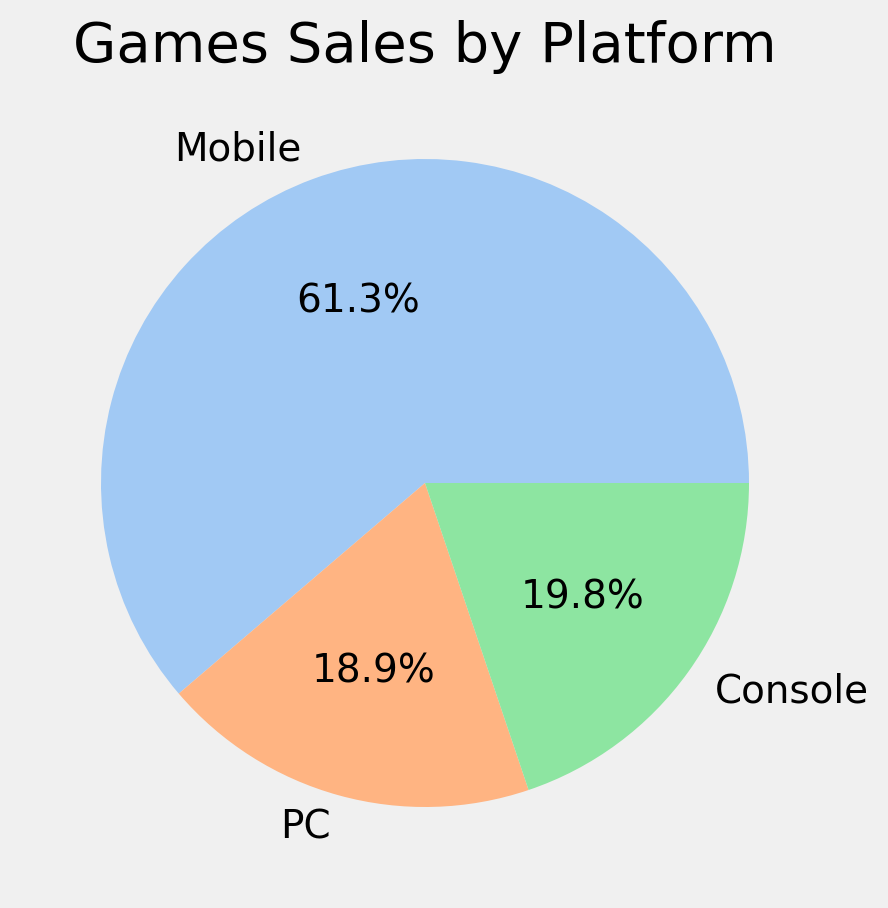

In [49]:
mobile_pies = [1360, 420, 440]
labels = ["Mobile", "PC", "Console"]
plt.title("Games Sales by Platform", x=0.5)
plt.pie(mobile_pies, labels=labels, autopct="%.1f%%", colors=sns.color_palette('pastel'));